## Clustering

Before implementing a complex Graph Neural Network (GNN) for unsupervised clustering, I want to clarify the problem, as the current research proposal seems vague. This step will help me understand our current leads and establish solid baselines. I aim for this research to be reproducible and fully open-sourced, facilitating easy use of our codebase and baselines by other researchers trying different methods.

### Settings

1. **Chunk Definition:**
   - A Chunk is a of 100 words.
   - For a book with 160 words, it will be split into: 1 chunk of 100 words each, plus 1 sentence of 60 words.

2. **Data Source:**
   - Using non-biblical Hebrew Qumran scrolls (383 books).

3. **Composition Labels:**
   - A composition is a label consisting of several books together.
   - For example, books 11Q20 and 11Q19 are from the Temple Scroll composition.
   - We currently have 25 unique compositions over 98 books.

4. **Clustering Methodology:**
   - **Step 1:** Convert each book into sentences.
   - **Step 2:** Vectorize the text (using n-grams, TF-IDF, Word2Vec, BERT, etc.).
   - **Step 3:** Clustering:
     - **Unsupervised Clustering:** 
       - Hierarchical Clustering
   - **Step 4:** Evaluation:
     - **Unsupervised Evaluation:** Metrics from [Cluster Analysis: Evaluation and Assessment](https://en.wikipedia.org/wiki/Cluster_analysis#Evaluation_and_assessment).
       - Examples: [Rand Index](https://en.wikipedia.org/wiki/Rand_index), [Silhouette Score](https://en.wikipedia.org/wiki/Silhouette_(clustering)), [Calinski-Harabasz Index](https://en.wikipedia.org/wiki/Calinski%E2%80%93Harabasz_index), etc.
       - The main objective will be the dasgupta score.

### Consideration for Supervised Clustering

- **Question:** Should we also perform supervised clustering?
  - **Labels:** Could be book or composition.
  - **Benefit:** This step could enhance confidence in our unsupervised methods.

### Clustering Objectives
We can explore various clustering strategies:

1. **Clustering by Chunk:**
   - Cluster chunks across all scrolls, when we wish to have chunks from the same composition together, and chunks that are close in the scrolls, also close together.

2. **Clustering by Composition:**
   - Cluster chunks to ensure they belong to the correct composition.

3. **Clustering within a Book:**
   - Cluster chunks to group those that are textually close within each book (as proposed in the research proposal).

4. **Clustering of Serech Hayahad:**
   - Focus specifically on clustering within the Serech Hayahad text.

5. **Temple Scroll Clustering:**
   - Differentiate between sectarian and non-sectarian content within the Temple Scroll.


### Reading list
1. [Document Embedding Techniques](https://towardsdatascience.com/document-embedding-techniques-fed3e7a6a25d)
2. Mining text data - book
3. [clustering-sentence-embeddings-to-identify-intents-in-short-text - PRACTICAL](https://towardsdatascience.com/clustering-sentence-embeddings-to-identify-intents-in-short-text-48d22d3bf02e)
4. [Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks](https://arxiv.org/abs/1908.10084)
5. [Open Intent Discovery through Unsupervised
Semantic Clustering and Dependency Parsing](https://arxiv.org/pdf/2104.12114)
6. [Is Everything in Order? A Simple Way to Order Sentences](https://aclanthology.org/2021.emnlp-main.841.pdf)
7. [The performance of BERT as data representation of text clustering](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-022-00564-9)
8. [Understanding and explaining Delta measures for authorship attribution](https://academic.oup.com/dsh/article/32/suppl_2/ii4/3865676)

Word ordering:
1. [Word Ordering as Unsupervised Learning
Towards Syntactically Plausible Word Representations](https://aclanthology.org/I17-1008.pdf)
2. [UNSUPERVISED ORDER LEARNING](https://openreview.net/pdf?id=1CK45cqkEh)
3. [Graph based Neural Sentence Ordering](https://github.com/DeepLearnXMU/NSEG)
4. [Graph based Neural Sentence Ordering](https://arxiv.org/pdf/1611.02654v2)
5. [A New Sentence Ordering Method Using BERT
Pretrained Model](https://arxiv.org/pdf/2108.11994)
6. https://openreview.net/pdf?id=S1AG8zYeg

Surveys:
1. [Short Text Clustering Algorithms, Application and Challenges: A Survey](https://www.mdpi.com/2076-3417/13/1/342)
2. [Incremental hierarchical text clustering methods: a review](https://arxiv.org/html/2312.07769v1)
3. [A comprehensive survey of clustering algorithms: State-of-the-art machine learning applications, taxonomy, challenges, and future research prospects](https://www.sciencedirect.com/science/article/pii/S095219762200046X)
4. [A Systematic Literature Review on Identifying Patterns Using Unsupervised Clustering Algorithms: A Data Mining Perspective](https://www.mdpi.com/2073-8994/15/9/1679)
5. [Constrained Clustering: Current and New Trends](https://link.springer.com/chapter/10.1007/978-3-030-06167-8_14) - offline

Clustering:
1. [Evaluation of Hierarchical Clustering Algorithms for
Document Datasets∗](https://dl.acm.org/doi/pdf/10.1145/584792.584877)
2. [An Objective for Hierarchical Clustering in Euclidean Space and its Connection to
Bisecting K-means∗](https://arxiv.org/pdf/2008.13235)
3. [Hierarchical Clustering: Objective Functions and Algorithms](https://arxiv.org/pdf/1704.02147)


Stylometry:
1. [https://pan.webis.de/organization.html](PAN - organiztion fot text forensics)
2. [Surveying Stylometry Techniques and Applications](https://dl.acm.org/doi/10.1145/3132039)
3. Advanced Models for Stylometric Applications - offline
4. [A review on authorship attribution in text mining
](https://wires.onlinelibrary.wiley.com/doi/abs/10.1002/wics.1584)


Graphs:
1. [Graph Embedding Techniques, Applications, and Performance: A Survey](https://arxiv.org/pdf/1705.02801)


TODO:
1. Reading:
    2. EOSL - page 485(504) - unsupervised learning.
    3. Dasgupta - https://arxiv.org/pdf/1510.05043 

In [6]:

import pandas as pd
from config import BASE_DIR
RERUN = False

In [7]:

from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

clustering_label = "composition"
CHUNK_SIZE = 100

DATA_PATH = f"{BASE_DIR}/notebooks/data/filtered_text_and_starr_features_{CHUNK_SIZE}_words_22_05_2024.csv"
df = pd.read_csv(DATA_PATH)
df_grouped = df.groupby("book")["text"].apply(' '.join).reset_index()
book_info = df[["book", "composition", "section", "text_lex"]].drop_duplicates()
df_by_book = pd.merge(df_grouped, book_info, on="book", how="inner").drop_duplicates(["book"])


df_by_book_non_nulls = df_by_book[~(df_by_book[clustering_label].isna())]

In [8]:


DATA_PATH = f"{BASE_DIR}/notebooks/data/filtered_text_and_starr_features_100_words_22_05_2024.csv"
df = pd.read_csv(DATA_PATH)
# df_grouped = df.groupby("book")["text"].apply(' '.join).reset_index()
# book_info = df[["book", "composition", "section", "text_lex"]].drop_duplicates()
# df_by_book = pd.merge(df_grouped, book_info, on="book", how="inner").drop_duplicates(["book"])

df_non_nulls = df[~(df[clustering_label].isna())]
df_by_sentence = df_non_nulls

## Baselines

Our dataset contains chunks of 100 words (using scrolls that have more than 300 words and written in hebrew).
I will use 4 different vectorizers: Starr, trigrams, BERT, tf-idf. When our metric for clustering will be the dgapusta score.

### Unsupervised clustering

In [9]:
def stratified_sample(df, stratify_column, frac, random_state=None):
    # Add an index column to preserve the original order
    df = df.reset_index().rename(columns={"index": "original_index"})
    grouped = df.groupby(stratify_column)
    
    stratified_df = grouped.apply(lambda x: x.sample(frac=frac, random_state=random_state)).reset_index(drop=True)

    stratified_df = stratified_df.sort_values(by="original_index").drop(columns=["original_index"])
    
    return stratified_df

sampled_df = stratified_sample(df, 'book', frac=0.4, random_state=42)
print(sampled_df["book"].value_counts())
print(df["book"].value_counts())

book
1Qisaa    73
4Q51      40
11Q19     40
1QHa      37
4Q22      28
          ..
4Q422      2
4Q48       2
4Q429      2
4Q432      2
Mas1e      2
Name: count, Length: 202, dtype: int64
book
1Qisaa    182
11Q19     100
4Q51       99
1QHa       93
4Q22       69
         ... 
4Q138       4
4Q135       4
4Q107       4
4Q26        4
4Q544       4
Name: count, Length: 202, dtype: int64


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sknetwork.hierarchy import dasgupta_score as calculate_dasgupta_score
import sklearn.cluster as sk
from tqdm.notebook import tqdm
from datetime import datetime
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
import scipy.sparse as sp
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt


def get_starr_features():
    from src.features.Starr.features_keys import feature_list
    return [i[0] for i in feature_list]



def bert_embed(texts, model, tokenizer):
    all_embeddings = []
    for text in tqdm(texts,desc="bert"):
        # Tokenize the text
        
        inputs = tokenizer(
        text, 
        return_tensors='pt', 
        padding=True,          # Pad sequences to the length of the longest sequence in the batch
        truncation=True,       # Truncate sequences longer than max_length
        max_length=tokenizer.model_max_length #512
    )
        with torch.no_grad():
            outputs = model(**inputs)
        
        # Take the mean of the last hidden state for the embedding
        embedding = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
        # print("Shape of last_hidden_state:", outputs.last_hidden_state.shape)
        # print("Shape of pooler_output:", outputs.pooler_output.shape)
        # print("Shape of embedding:", embedding.shape)
        
        all_embeddings.append(embedding)
    return np.vstack(all_embeddings)


def vectorize_text(df, text_column, vectorizer_type):
    if vectorizer_type == 'tfidf':
        vectorizer = TfidfVectorizer()
        vectorizer_matrix = vectorizer.fit_transform(df[text_column])
    elif vectorizer_type == 'trigram':
        vectorizer = CountVectorizer(ngram_range=(3, 3), analyzer='char')
        vectorizer_matrix = vectorizer.fit_transform(df[text_column])
    elif vectorizer_type == 'BOW':
        vectorizer = CountVectorizer(analyzer='word')
        vectorizer_matrix = vectorizer.fit_transform(df[text_column])
    elif vectorizer_type == 'starr':
        starr_cols = get_starr_features()
        vectorizer_matrix = df[starr_cols].to_numpy()
    elif vectorizer_type == 'bert':
        tokenizer = AutoTokenizer.from_pretrained('onlplab/alephbert-base')
        model = AutoModel.from_pretrained('onlplab/alephbert-base')

        vectorizer_matrix = bert_embed(df[text_column].tolist(), model, tokenizer)
    else:
        raise ValueError("Unsupported vectorizer type.")
    return vectorizer_matrix

def get_linkage_matrix(model):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in (enumerate(model.children_)):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    return linkage_matrix

def shorten_path(sentence_path):
    splitted = [i.split(":") for i in sentence_path.split("-")]
    return f'{splitted[0][0]}:{splitted[0][1]}-{splitted[1][0]}'
def matplotlib_dendrogram(linkage_matrix, sample_names, metadata):
    plt.figure(figsize=(25, 18))
    dendrogram(
        linkage_matrix,
        leaf_label_func=lambda x: shorten_path(sample_names[x]),
        orientation="right",
        color_threshold=0.7 * max(linkage_matrix[:, 2])  # Adjust color threshold
    )
    
    plt.title(metadata["vectorizer_type"], fontsize=16)
    plt.ylabel("Scroll:Line-Line")
    plt.tick_params(
        axis="x",  # changes apply to the x-axis
        which="both",  # both major and minor ticks are affected
        bottom=False,  # ticks along the bottom edge are off
        top=False,  # ticks along the top edge are off
        labelbottom=False,
    )
    plt.tick_params(
        axis="y",  # changes apply to the x-axis
        which="both",  # both major and minor ticks are affected,
        labelsize=12,
    )
    plt.tight_layout()
    plt.show()
def get_clusters_scores(
    df,
    label_name,
    vectorizer_matrix,
    linkage_criterion,
    plot=False,
    metadata=None
):
    if sp.issparse(vectorizer_matrix):
        vectorizer_matrix = vectorizer_matrix.toarray()
    sample_names = df[label_name].to_list()
    model = sk.AgglomerativeClustering(
        distance_threshold=0, n_clusters=None, linkage=linkage_criterion
    )
    print(f"{datetime.now()} - fitting AgglomerativeClustering")
    model.fit_predict(vectorizer_matrix)
    adjacency_matrix = np.zeros((len(sample_names), len(sample_names)))
    for i in range(0, adjacency_matrix.shape[0] - 1):
        adjacency_matrix[i, i + 1] = 1
        adjacency_matrix[i + 1, i] = 1
    print(f"{datetime.now()} - getting linkage matrix")
    linkage_matrix = get_linkage_matrix(model)
    
    print(f"{datetime.now()} - calculate_dasgupta_score")
    score = calculate_dasgupta_score(adjacency_matrix, linkage_matrix)
    if plot:
        matplotlib_dendrogram(linkage_matrix, sample_names, metadata)

    return score

def get_random_clusters_score(
    df,
    label_name,
    vectorizer_matrix,
    linkage_criterion,
    iters=10
):
    random_scores = []
    if sp.issparse(vectorizer_matrix):
        vectorizer_matrix = vectorizer_matrix.toarray()
    sample_names = df[label_name].to_list()
    print(f"{datetime.now()} - calculate rand dasgupta_score")
    for i in tqdm(range(iters)):
        indexes = np.arange(len(vectorizer_matrix))
        np.random.shuffle(indexes)
        model = sk.AgglomerativeClustering(
            distance_threshold=0, n_clusters=None, linkage="ward"
        )
        model.fit_predict(vectorizer_matrix[indexes])
        linkage_matrix = get_linkage_matrix(model)
        adjacency_matrix = np.zeros((len(sample_names), len(sample_names)))
        for i in range(0, adjacency_matrix.shape[0] - 1):
            adjacency_matrix[i, i + 1] = 1
            adjacency_matrix[i + 1, i] = 1
        
        dasgupta_score_rand = calculate_dasgupta_score(adjacency_matrix, linkage_matrix)
        random_scores.append(dasgupta_score_rand)
        
    return np.mean(np.array(random_scores))


In [11]:
#cross validation without overlapping
    
# NUM_CVS = 2
# sampled_df = stratified_sample(df, 'book', frac=0.2, random_state=42)
# # sampled_df = df.copy()
# splits = np.array_split(sampled_df, NUM_CVS)

# scores = []

# vectorizers= ["starr","trigram", "bert", "tfidf"]

# for i,df_cv in tqdm(enumerate(splits)):
#     print(f"{datetime.now()} - {df_cv.shape=}")
#     for vectorizer_type in tqdm(vectorizers):
#         vectorizer_matrix = vectorize_text(df_cv,"text", vectorizer_type)
#         print(f"{datetime.now()} - {vectorizer_type=},{vectorizer_matrix.shape=}")
#         dasgupta_score = get_clusters_scores(df_cv, "sentence_path", vectorizer_matrix, "ward",plot=False, metadata={"vectorizer_type":vectorizer_type})
#         # dasgupta_score_rand = get_random_clusters_score(df_sampled, "sentence_path", vectorizer_matrix, "ward")
#         print(f"{dasgupta_score=}\n")
#         scores.append({"vectorizer":vectorizer_type, "dasgupta_score": dasgupta_score, "cv":i})

In [12]:
# Cross validation with overlapping
NUM_CVS = 10
FRAC = 0.9
scores = []

vectorizers= ["trigram", "bert", "tfidf", "starr"]

# Define the stratified sampling function
def stratified_sample(df, stratify_column, frac, random_state=None):
    df = df.reset_index().rename(columns={"index": "original_index"})
    grouped = df.groupby(stratify_column)
    stratified_df = grouped.apply(lambda x: x.sample(frac=frac, random_state=random_state)).reset_index(drop=True)
    stratified_df = stratified_df.sort_values(by="original_index").drop(columns=["original_index"])
    return stratified_df

for i in tqdm(range(NUM_CVS)):
    # Sample 90% of the data
    sampled_df = stratified_sample(df, 'book', frac=FRAC, random_state=42 + i)
    print(f"{datetime.now()} - {sampled_df.shape=}")
    
    for vectorizer_type in tqdm(vectorizers):
        vectorizer_matrix = vectorize_text(sampled_df, "text", vectorizer_type)
        print(f"{datetime.now()} - {vectorizer_type=},{vectorizer_matrix.shape=}")
        
        dasgupta_score = get_clusters_scores(sampled_df, "sentence_path", vectorizer_matrix, "ward", plot=False, metadata={"vectorizer_type":vectorizer_type})
        dasgupta_score_rand = get_random_clusters_score(sampled_df, "sentence_path", vectorizer_matrix, "ward", iters=2)
        print(f"{dasgupta_score=}, {dasgupta_score_rand=}\n")
        
        scores.append({"vectorizer": vectorizer_type, "dasgupta_score": dasgupta_score, "dasgupta_score_rand":dasgupta_score_rand, "cv": i})

# Convert scores to a DataFrame for easier analysis
scores_df = pd.DataFrame(scores)

  0%|          | 0/10 [00:00<?, ?it/s]

2024-06-03 23:53:42.572609 - sampled_df.shape=(2674, 25)


  0%|          | 0/4 [00:00<?, ?it/s]

2024-06-03 23:53:43.108898 - vectorizer_type='trigram',vectorizer_matrix.shape=(2674, 8810)
2024-06-03 23:53:43.201497 - fitting AgglomerativeClustering
2024-06-03 23:54:01.545209 - getting linkage matrix
2024-06-03 23:54:01.549542 - calculate_dasgupta_score
2024-06-03 23:54:01.703114 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7518211002795063, dasgupta_score_rand=0.3334963950147197



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream

bert:   0%|          | 0/2674 [00:00<?, ?it/s]

2024-06-03 23:58:45.784015 - vectorizer_type='bert',vectorizer_matrix.shape=(2674, 768)
2024-06-03 23:58:45.784253 - fitting AgglomerativeClustering
2024-06-03 23:58:47.302630 - getting linkage matrix
2024-06-03 23:58:47.307534 - calculate_dasgupta_score
2024-06-03 23:58:47.426165 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7674168203545748, dasgupta_score_rand=0.335954562103486

2024-06-03 23:58:50.710208 - vectorizer_type='tfidf',vectorizer_matrix.shape=(2674, 34071)
2024-06-03 23:58:50.921079 - fitting AgglomerativeClustering
2024-06-04 00:00:01.069120 - getting linkage matrix
2024-06-04 00:00:01.074785 - calculate_dasgupta_score
2024-06-04 00:00:01.447397 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7773321737835991, dasgupta_score_rand=0.33480949275015603

2024-06-04 00:02:29.174249 - vectorizer_type='starr',vectorizer_matrix.shape=(2674, 16)
2024-06-04 00:02:29.174348 - fitting AgglomerativeClustering
2024-06-04 00:02:29.359072 - getting linkage matrix
2024-06-04 00:02:29.363591 - calculate_dasgupta_score
2024-06-04 00:02:29.489624 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5516389972469088, dasgupta_score_rand=0.32945357058213376

2024-06-04 00:02:30.306025 - sampled_df.shape=(2674, 25)


  0%|          | 0/4 [00:00<?, ?it/s]

2024-06-04 00:02:31.204794 - vectorizer_type='trigram',vectorizer_matrix.shape=(2674, 8831)
2024-06-04 00:02:31.295745 - fitting AgglomerativeClustering
2024-06-04 00:02:49.735669 - getting linkage matrix
2024-06-04 00:02:49.740174 - calculate_dasgupta_score
2024-06-04 00:02:49.874574 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.727055171790483, dasgupta_score_rand=0.3280826212763386



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/2674 [00:00<?, ?it/s]

2024-06-04 00:07:47.427984 - vectorizer_type='bert',vectorizer_matrix.shape=(2674, 768)
2024-06-04 00:07:47.428295 - fitting AgglomerativeClustering
2024-06-04 00:07:49.105698 - getting linkage matrix
2024-06-04 00:07:49.111762 - calculate_dasgupta_score
2024-06-04 00:07:49.245550 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7645187854611939, dasgupta_score_rand=0.3359442789343895

2024-06-04 00:07:52.771728 - vectorizer_type='tfidf',vectorizer_matrix.shape=(2674, 33894)
2024-06-04 00:07:52.981236 - fitting AgglomerativeClustering
2024-06-04 00:09:02.544264 - getting linkage matrix
2024-06-04 00:09:02.549453 - calculate_dasgupta_score
2024-06-04 00:09:02.911290 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7439772108183976, dasgupta_score_rand=0.34260441473937703

2024-06-04 00:11:23.322570 - vectorizer_type='starr',vectorizer_matrix.shape=(2674, 16)
2024-06-04 00:11:23.322654 - fitting AgglomerativeClustering
2024-06-04 00:11:23.494155 - getting linkage matrix
2024-06-04 00:11:23.498085 - calculate_dasgupta_score
2024-06-04 00:11:23.597457 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5439201846997077, dasgupta_score_rand=0.32602430857230164

2024-06-04 00:11:24.263141 - sampled_df.shape=(2674, 25)


  0%|          | 0/4 [00:00<?, ?it/s]

2024-06-04 00:11:24.781045 - vectorizer_type='trigram',vectorizer_matrix.shape=(2674, 8823)
2024-06-04 00:11:24.803002 - fitting AgglomerativeClustering
2024-06-04 00:11:42.815822 - getting linkage matrix
2024-06-04 00:11:42.820337 - calculate_dasgupta_score
2024-06-04 00:11:42.960759 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7316193598916112, dasgupta_score_rand=0.33313452539746913



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/2674 [00:00<?, ?it/s]

2024-06-04 00:16:22.894561 - vectorizer_type='bert',vectorizer_matrix.shape=(2674, 768)
2024-06-04 00:16:22.894924 - fitting AgglomerativeClustering
2024-06-04 00:16:24.531117 - getting linkage matrix
2024-06-04 00:16:24.536169 - calculate_dasgupta_score
2024-06-04 00:16:24.665128 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7694647799359842, dasgupta_score_rand=0.33731263995952776

2024-06-04 00:16:28.036410 - vectorizer_type='tfidf',vectorizer_matrix.shape=(2674, 34005)
2024-06-04 00:16:28.238784 - fitting AgglomerativeClustering
2024-06-04 00:17:38.385995 - getting linkage matrix
2024-06-04 00:17:38.390902 - calculate_dasgupta_score
2024-06-04 00:17:38.730567 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7676044357254364, dasgupta_score_rand=0.3414829896796157

2024-06-04 00:19:57.903851 - vectorizer_type='starr',vectorizer_matrix.shape=(2674, 16)
2024-06-04 00:19:57.903941 - fitting AgglomerativeClustering
2024-06-04 00:19:58.078471 - getting linkage matrix
2024-06-04 00:19:58.082233 - calculate_dasgupta_score
2024-06-04 00:19:58.176006 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5514905558535577, dasgupta_score_rand=0.32843036028027306

2024-06-04 00:19:58.911983 - sampled_df.shape=(2674, 25)


  0%|          | 0/4 [00:00<?, ?it/s]

2024-06-04 00:19:59.416953 - vectorizer_type='trigram',vectorizer_matrix.shape=(2674, 8787)
2024-06-04 00:19:59.439086 - fitting AgglomerativeClustering
2024-06-04 00:20:16.922802 - getting linkage matrix
2024-06-04 00:20:16.926970 - calculate_dasgupta_score
2024-06-04 00:20:17.092163 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7232576743920549, dasgupta_score_rand=0.32655168824453307



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/2674 [00:00<?, ?it/s]

2024-06-04 00:24:42.145461 - vectorizer_type='bert',vectorizer_matrix.shape=(2674, 768)
2024-06-04 00:24:42.145699 - fitting AgglomerativeClustering
2024-06-04 00:24:43.695423 - getting linkage matrix
2024-06-04 00:24:43.700248 - calculate_dasgupta_score
2024-06-04 00:24:43.819134 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7559139414869491, dasgupta_score_rand=0.3340050970941025

2024-06-04 00:24:47.207647 - vectorizer_type='tfidf',vectorizer_matrix.shape=(2674, 33840)
2024-06-04 00:24:47.403613 - fitting AgglomerativeClustering
2024-06-04 00:25:57.879617 - getting linkage matrix
2024-06-04 00:25:57.883700 - calculate_dasgupta_score
2024-06-04 00:25:58.222190 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7578544524443304, dasgupta_score_rand=0.3320009284232671

2024-06-04 00:28:21.266247 - vectorizer_type='starr',vectorizer_matrix.shape=(2674, 16)
2024-06-04 00:28:21.266337 - fitting AgglomerativeClustering
2024-06-04 00:28:21.441844 - getting linkage matrix
2024-06-04 00:28:21.445456 - calculate_dasgupta_score
2024-06-04 00:28:21.543768 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5462432015660637, dasgupta_score_rand=0.32639674117277384

2024-06-04 00:28:22.308686 - sampled_df.shape=(2674, 25)


  0%|          | 0/4 [00:00<?, ?it/s]

2024-06-04 00:28:22.822249 - vectorizer_type='trigram',vectorizer_matrix.shape=(2674, 8828)
2024-06-04 00:28:22.846426 - fitting AgglomerativeClustering
2024-06-04 00:28:40.355185 - getting linkage matrix
2024-06-04 00:28:40.359403 - calculate_dasgupta_score
2024-06-04 00:28:40.483264 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7241460842391616, dasgupta_score_rand=0.3322414286637673



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/2674 [00:00<?, ?it/s]

2024-06-04 00:33:18.956962 - vectorizer_type='bert',vectorizer_matrix.shape=(2674, 768)
2024-06-04 00:33:18.957209 - fitting AgglomerativeClustering
2024-06-04 00:33:20.533301 - getting linkage matrix
2024-06-04 00:33:20.543102 - calculate_dasgupta_score
2024-06-04 00:33:20.661971 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7730143620195977, dasgupta_score_rand=0.337108235741162

2024-06-04 00:33:23.900755 - vectorizer_type='tfidf',vectorizer_matrix.shape=(2674, 34056)
2024-06-04 00:33:24.099258 - fitting AgglomerativeClustering
2024-06-04 00:34:35.788032 - getting linkage matrix
2024-06-04 00:34:35.797303 - calculate_dasgupta_score
2024-06-04 00:34:36.135234 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7730907512757426, dasgupta_score_rand=0.33007895515167196

2024-06-04 00:37:01.621563 - vectorizer_type='starr',vectorizer_matrix.shape=(2674, 16)
2024-06-04 00:37:01.621646 - fitting AgglomerativeClustering
2024-06-04 00:37:01.798621 - getting linkage matrix
2024-06-04 00:37:01.802532 - calculate_dasgupta_score
2024-06-04 00:37:01.901973 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5535320797100902, dasgupta_score_rand=0.3374170805817113

2024-06-04 00:37:02.534991 - sampled_df.shape=(2674, 25)


  0%|          | 0/4 [00:00<?, ?it/s]

2024-06-04 00:37:03.048076 - vectorizer_type='trigram',vectorizer_matrix.shape=(2674, 8798)
2024-06-04 00:37:03.071915 - fitting AgglomerativeClustering
2024-06-04 00:37:21.058646 - getting linkage matrix
2024-06-04 00:37:21.063177 - calculate_dasgupta_score
2024-06-04 00:37:21.196755 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7291341907397754, dasgupta_score_rand=0.3334719112787758



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/2674 [00:00<?, ?it/s]

2024-06-04 00:42:03.032701 - vectorizer_type='bert',vectorizer_matrix.shape=(2674, 768)
2024-06-04 00:42:03.032969 - fitting AgglomerativeClustering
2024-06-04 00:42:04.655724 - getting linkage matrix
2024-06-04 00:42:04.662093 - calculate_dasgupta_score
2024-06-04 00:42:04.800798 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.779064503031926, dasgupta_score_rand=0.33332116141889273

2024-06-04 00:42:08.239142 - vectorizer_type='tfidf',vectorizer_matrix.shape=(2674, 34198)
2024-06-04 00:42:08.436394 - fitting AgglomerativeClustering
2024-06-04 00:43:17.418052 - getting linkage matrix
2024-06-04 00:43:17.421887 - calculate_dasgupta_score
2024-06-04 00:43:17.745429 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7636670312644718, dasgupta_score_rand=0.33008490120183

2024-06-04 00:45:36.957844 - vectorizer_type='starr',vectorizer_matrix.shape=(2674, 16)
2024-06-04 00:45:36.957934 - fitting AgglomerativeClustering
2024-06-04 00:45:37.129077 - getting linkage matrix
2024-06-04 00:45:37.132753 - calculate_dasgupta_score
2024-06-04 00:45:37.224849 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5171158103095276, dasgupta_score_rand=0.3366599035592637

2024-06-04 00:45:37.869864 - sampled_df.shape=(2674, 25)


  0%|          | 0/4 [00:00<?, ?it/s]

2024-06-04 00:45:38.380804 - vectorizer_type='trigram',vectorizer_matrix.shape=(2674, 8792)
2024-06-04 00:45:38.404784 - fitting AgglomerativeClustering
2024-06-04 00:45:56.256294 - getting linkage matrix
2024-06-04 00:45:56.260816 - calculate_dasgupta_score
2024-06-04 00:45:56.393256 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7194699704880043, dasgupta_score_rand=0.3321708455507177



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/2674 [00:00<?, ?it/s]

2024-06-04 00:50:32.943508 - vectorizer_type='bert',vectorizer_matrix.shape=(2674, 768)
2024-06-04 00:50:32.943757 - fitting AgglomerativeClustering
2024-06-04 00:50:34.552059 - getting linkage matrix
2024-06-04 00:50:34.556696 - calculate_dasgupta_score
2024-06-04 00:50:34.686058 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7629595212492246, dasgupta_score_rand=0.32805890702923857

2024-06-04 00:50:37.874587 - vectorizer_type='tfidf',vectorizer_matrix.shape=(2674, 33745)
2024-06-04 00:50:38.070255 - fitting AgglomerativeClustering
2024-06-04 00:51:48.264208 - getting linkage matrix
2024-06-04 00:51:48.268478 - calculate_dasgupta_score
2024-06-04 00:51:48.594445 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7881937186765576, dasgupta_score_rand=0.3400786725394057

2024-06-04 00:54:10.063155 - vectorizer_type='starr',vectorizer_matrix.shape=(2674, 16)
2024-06-04 00:54:10.063243 - fitting AgglomerativeClustering
2024-06-04 00:54:10.308962 - getting linkage matrix
2024-06-04 00:54:10.313467 - calculate_dasgupta_score
2024-06-04 00:54:10.416113 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5346239200224076, dasgupta_score_rand=0.33845008437794954

2024-06-04 00:54:11.193088 - sampled_df.shape=(2674, 25)


  0%|          | 0/4 [00:00<?, ?it/s]

2024-06-04 00:54:11.710020 - vectorizer_type='trigram',vectorizer_matrix.shape=(2674, 8827)
2024-06-04 00:54:11.733099 - fitting AgglomerativeClustering
2024-06-04 00:54:29.420274 - getting linkage matrix
2024-06-04 00:54:29.424204 - calculate_dasgupta_score
2024-06-04 00:54:29.549592 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7150538040590397, dasgupta_score_rand=0.3328148377595732



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/2674 [00:00<?, ?it/s]

2024-06-04 00:59:16.536809 - vectorizer_type='bert',vectorizer_matrix.shape=(2674, 768)
2024-06-04 00:59:16.537055 - fitting AgglomerativeClustering
2024-06-04 00:59:18.169525 - getting linkage matrix
2024-06-04 00:59:18.174207 - calculate_dasgupta_score
2024-06-04 00:59:18.301244 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7658239784475969, dasgupta_score_rand=0.32942293093543834

2024-06-04 00:59:21.668643 - vectorizer_type='tfidf',vectorizer_matrix.shape=(2674, 33967)
2024-06-04 00:59:21.867280 - fitting AgglomerativeClustering
2024-06-04 01:00:31.186048 - getting linkage matrix
2024-06-04 01:00:31.190199 - calculate_dasgupta_score
2024-06-04 01:00:31.526654 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7708235573273386, dasgupta_score_rand=0.33335522878862034

2024-06-04 01:02:51.043668 - vectorizer_type='starr',vectorizer_matrix.shape=(2674, 16)
2024-06-04 01:02:51.043756 - fitting AgglomerativeClustering
2024-06-04 01:02:51.223484 - getting linkage matrix
2024-06-04 01:02:51.227606 - calculate_dasgupta_score
2024-06-04 01:02:51.326996 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5593354246641041, dasgupta_score_rand=0.34090706225668416

2024-06-04 01:02:51.979595 - sampled_df.shape=(2674, 25)


  0%|          | 0/4 [00:00<?, ?it/s]

2024-06-04 01:02:52.575726 - vectorizer_type='trigram',vectorizer_matrix.shape=(2674, 8792)
2024-06-04 01:02:52.708518 - fitting AgglomerativeClustering
2024-06-04 01:03:10.528324 - getting linkage matrix
2024-06-04 01:03:10.532417 - calculate_dasgupta_score
2024-06-04 01:03:10.664366 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7101896552158333, dasgupta_score_rand=0.3383282253264802



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/2674 [00:00<?, ?it/s]

2024-06-04 01:07:57.690236 - vectorizer_type='bert',vectorizer_matrix.shape=(2674, 768)
2024-06-04 01:07:57.690464 - fitting AgglomerativeClustering
2024-06-04 01:07:59.199974 - getting linkage matrix
2024-06-04 01:07:59.208897 - calculate_dasgupta_score
2024-06-04 01:07:59.333900 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7641653802212267, dasgupta_score_rand=0.33415444788336

2024-06-04 01:08:02.748481 - vectorizer_type='tfidf',vectorizer_matrix.shape=(2674, 33756)
2024-06-04 01:08:02.950982 - fitting AgglomerativeClustering
2024-06-04 01:09:13.707417 - getting linkage matrix
2024-06-04 01:09:13.711555 - calculate_dasgupta_score
2024-06-04 01:09:14.043373 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7690913679860742, dasgupta_score_rand=0.3233261309177541

2024-06-04 01:11:37.012406 - vectorizer_type='starr',vectorizer_matrix.shape=(2674, 16)
2024-06-04 01:11:37.012493 - fitting AgglomerativeClustering
2024-06-04 01:11:37.193044 - getting linkage matrix
2024-06-04 01:11:37.196779 - calculate_dasgupta_score
2024-06-04 01:11:37.289823 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5461528216036651, dasgupta_score_rand=0.3300390116853177

2024-06-04 01:11:37.925463 - sampled_df.shape=(2674, 25)


  0%|          | 0/4 [00:00<?, ?it/s]

2024-06-04 01:11:38.430698 - vectorizer_type='trigram',vectorizer_matrix.shape=(2674, 8815)
2024-06-04 01:11:38.455053 - fitting AgglomerativeClustering
2024-06-04 01:11:56.340165 - getting linkage matrix
2024-06-04 01:11:56.344141 - calculate_dasgupta_score
2024-06-04 01:11:56.469411 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7195471991865245, dasgupta_score_rand=0.331270193835639



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/2674 [00:00<?, ?it/s]

2024-06-04 01:16:33.078110 - vectorizer_type='bert',vectorizer_matrix.shape=(2674, 768)
2024-06-04 01:16:33.078341 - fitting AgglomerativeClustering
2024-06-04 01:16:34.580338 - getting linkage matrix
2024-06-04 01:16:34.584679 - calculate_dasgupta_score
2024-06-04 01:16:34.702803 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.7804613351442904, dasgupta_score_rand=0.32427575010472054

2024-06-04 01:16:37.925964 - vectorizer_type='tfidf',vectorizer_matrix.shape=(2674, 33975)
2024-06-04 01:16:38.124991 - fitting AgglomerativeClustering
2024-06-04 01:17:47.097825 - getting linkage matrix
2024-06-04 01:17:47.102854 - calculate_dasgupta_score
2024-06-04 01:17:47.440322 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.755450009667578, dasgupta_score_rand=0.33002180311662577

2024-06-04 01:20:06.982287 - vectorizer_type='starr',vectorizer_matrix.shape=(2674, 16)
2024-06-04 01:20:06.982376 - fitting AgglomerativeClustering
2024-06-04 01:20:07.157325 - getting linkage matrix
2024-06-04 01:20:07.161235 - calculate_dasgupta_score
2024-06-04 01:20:07.257507 - calculate rand dasgupta_score


  0%|          | 0/2 [00:00<?, ?it/s]

dasgupta_score=0.5466237487761632, dasgupta_score_rand=0.32892884914409065



In [43]:
scores_df = pd.DataFrame(scores)
scores_df.to_csv(f"{BASE_DIR}/notebooks/reports/dasgupta_scores.csv", index=False)

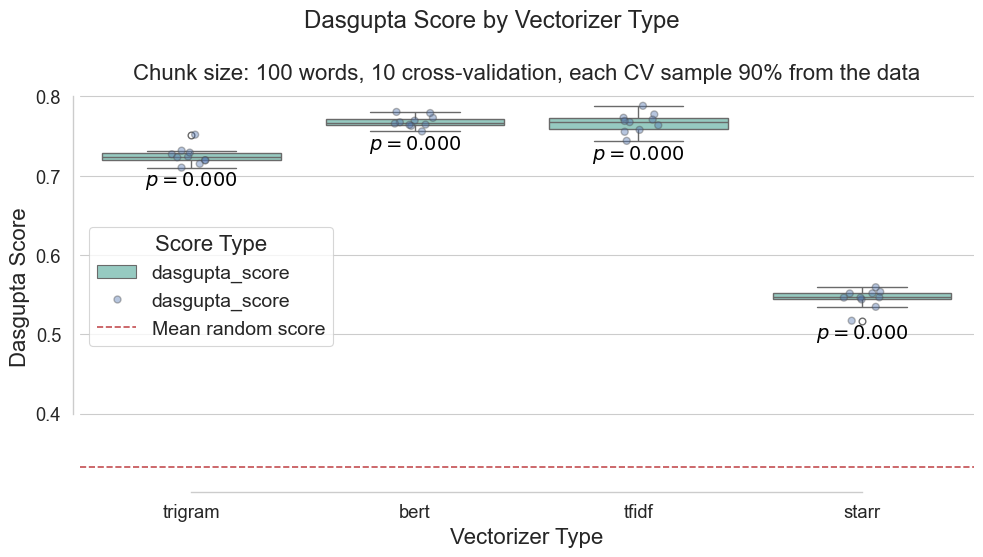

In [24]:
import seaborn as sns
from scipy.stats import ttest_ind
P_VAL_RANDOM_TEST=True
SHOW_MEAN_SCORES = True
# Convert scores to a DataFrame
scores_df = pd.DataFrame(scores)
mean_rand_score = scores_df['dasgupta_score_rand'].mean()
long_scores_df = pd.melt(scores_df.drop('dasgupta_score_rand', axis=1), id_vars=['vectorizer'], value_vars=['dasgupta_score'])

p_values = {}
for vectorizer in scores_df['vectorizer'].unique():
    dasgupta_scores = scores_df[scores_df['vectorizer'] == vectorizer]['dasgupta_score']
    if P_VAL_RANDOM_TEST:
        rand_scores = scores_df[scores_df['vectorizer'] == vectorizer]['dasgupta_score_rand']
    else:
        rand_scores = scores_df[scores_df['vectorizer'] == vectorizer]['dasgupta_score']
    _, p_value = ttest_ind(dasgupta_scores, rand_scores, alternative='greater')
    p_values[vectorizer] = p_value

# Set the style of the visualization
sns.set(style="whitegrid", context="paper", font_scale=1.5)

# Create the box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=long_scores_df, x="vectorizer", y="value", hue="variable", palette="Set3")
ax = sns.stripplot(long_scores_df, x="vectorizer", y="value", hue="variable",
                      linewidth = 1,     # Dot outline width
                      alpha = 0.4)       # Makes them transparent
# Plot the mean random score as a dashed line
plt.axhline(y=mean_rand_score, color='r', linestyle='--', label="Mean random score")

# Add p-values on top of each boxplot
for i, vectorizer in enumerate(p_values.keys()):
    p_val = p_values[vectorizer]
    ax.text(i, long_scores_df[long_scores_df['vectorizer']==vectorizer]['value'].min() - 0.03, f'$p={p_val:.3f}$', ha='center', va='bottom', fontsize=14, color='black')

# Add a title and labels
plt.suptitle("Dasgupta Score by Vectorizer Type ")
plt.title(f"Chunk size: {CHUNK_SIZE} words, {NUM_CVS} cross-validation, each CV sample {FRAC:.0%} from the data", fontsize=16)


plt.xlabel('Vectorizer Type', fontsize=16)
plt.ylabel('Dasgupta Score', fontsize=16)

# Customize the legend
plt.legend(title='Score Type', fontsize=14, title_fontsize=16, loc='best')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Improve layout
plt.tight_layout()

# Remove top and right spines for a cleaner look
sns.despine(offset = 5, trim = True)

# Show the plot
plt.savefig(f"{BASE_DIR}/notebooks/reports/dasgupta_scores.png")
plt.show()

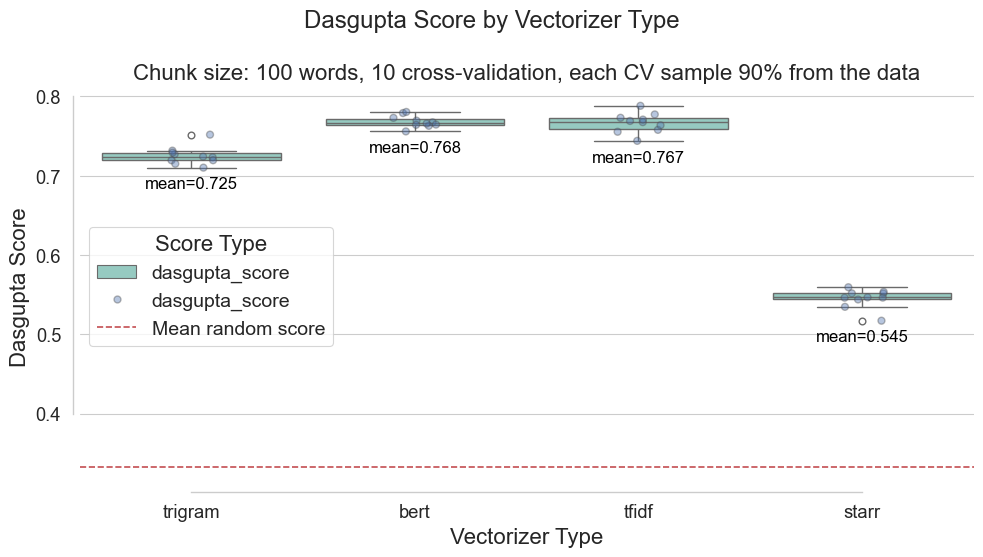

In [32]:
import seaborn as sns
from scipy.stats import ttest_ind
P_VAL_RANDOM_TEST=True
SHOW_MEAN_SCORES = True  # Set this to True to show mean scores

# Convert scores to a DataFrame
scores_df = pd.DataFrame(scores)
mean_rand_score = scores_df['dasgupta_score_rand'].mean()
long_scores_df = pd.melt(scores_df.drop('dasgupta_score_rand', axis=1), id_vars=['vectorizer'], value_vars=['dasgupta_score'])

p_values = {}
for vectorizer in scores_df['vectorizer'].unique():
  dasgupta_scores = scores_df[scores_df['vectorizer'] == vectorizer]['dasgupta_score']
  if P_VAL_RANDOM_TEST:
    rand_scores = scores_df[scores_df['vectorizer'] == vectorizer]['dasgupta_score_rand']
  else:
    rand_scores = scores_df[scores_df['vectorizer'] == vectorizer]['dasgupta_score']
  _, p_value = ttest_ind(dasgupta_scores, rand_scores, alternative='greater')
  p_values[vectorizer] = p_value

# Set the style of the visualization
sns.set(style="whitegrid", context="paper", font_scale=1.5)

# Create the box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=long_scores_df, x="vectorizer", y="value", hue="variable", palette="Set3")
ax = sns.stripplot(long_scores_df, x="vectorizer", y="value", hue="variable",
                   linewidth = 1,  # Dot outline width
                   alpha = 0.4)    # Makes them transparent

# Plot the mean random score as a dashed line
plt.axhline(y=mean_rand_score, color='r', linestyle='--', label="Mean random score")

# Add p-values on top of each boxplot
# for i, vectorizer in enumerate(p_values.keys()):
#   p_val = p_values[vectorizer]
#   ax.text(i, long_scores_df[long_scores_df['vectorizer']==vectorizer]['value'].min() - 0.03, f'$p={p_val:.3f}$', ha='center', va='bottom', fontsize=14, color='black')

# Calculate mean for each vectorizer group
mean_scores = long_scores_df.groupby('vectorizer')['value'].mean()

# Add text for mean scores (if option is enabled)
if SHOW_MEAN_SCORES:
  for i, vectorizer in enumerate(long_scores_df['vectorizer'].unique()):
    mean_value = mean_scores.loc[vectorizer]
    # Adjust position based on boxplot elements (might require some tuning)
    ax.text(i, min(long_scores_df[long_scores_df['vectorizer'] == vectorizer]['value']) - 0.03, f'mean={mean_value:.3f}', ha='center', va='bottom', fontsize=12, color='black')

# Add a title and labels
plt.suptitle("Dasgupta Score by Vectorizer Type ")
plt.title(f"Chunk size: {CHUNK_SIZE} words, {NUM_CVS} cross-validation, each CV sample {FRAC:.0%} from the data", fontsize=16)


plt.xlabel('Vectorizer Type', fontsize=16)
plt.ylabel('Dasgupta Score', fontsize=16)

# Customize the legend
plt.legend(title='Score Type', fontsize=14, title_fontsize=16, loc='best')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Improve layout
plt.tight_layout()

# Remove top and right spines for a cleaner look
sns.despine(offset = 5, trim = True)

# Show the plot
plt.savefig(f"{BASE_DIR}/notebooks/reports/dasgupta_scores.png")
plt.show()

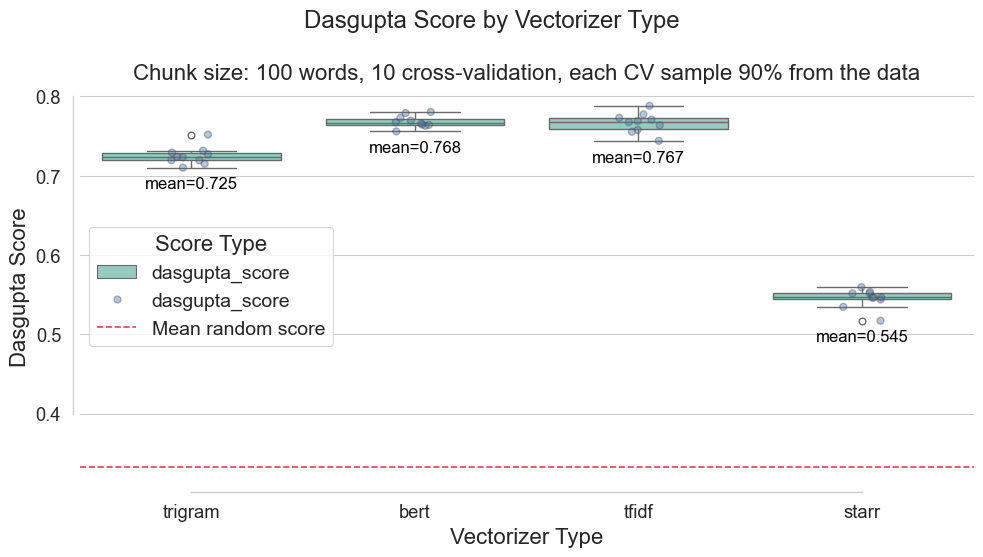

In [39]:
import seaborn as sns
from scipy.stats import ttest_ind


def create_dasgupta_score_plot(scores, chunk_size, num_cvs, frac, show_p_val=False,
                               p_val_random_test=True, show_mean_scores=True):
  """
  This function creates a box plot of Dasgupta scores for different vectorizer types.

  Args:
      scores: A dictionary containing the scores.
      chunk_size: Size of the chunks used for vectorization (in words).
      num_cvs: Number of cross-validation folds used.
      frac: Fraction of the data used in each CV sample.
      p_val_random_test: Whether to calculate p-values against a random baseline (True) or own baseline (False).
      show_mean_scores: Whether to display the mean score for each vectorizer group (True).
  """
  # Convert scores to a DataFrame
  scores_df = pd.DataFrame(scores)
  mean_rand_score = scores_df['dasgupta_score_rand'].mean()
  long_scores_df = pd.melt(scores_df.drop('dasgupta_score_rand', axis=1), id_vars=['vectorizer'], value_vars=['dasgupta_score'])

  p_values = {}
  for vectorizer in scores_df['vectorizer'].unique():
    dasgupta_scores = scores_df[scores_df['vectorizer'] == vectorizer]['dasgupta_score']
    if p_val_random_test:
      rand_scores = scores_df[scores_df['vectorizer'] == vectorizer]['dasgupta_score_rand']
    else:
      rand_scores = scores_df[scores_df['vectorizer'] == vectorizer]['dasgupta_score']
    _, p_value = ttest_ind(dasgupta_scores, rand_scores, alternative='greater')
    p_values[vectorizer] = p_value

  # Set the style of the visualization
  sns.set(style="whitegrid", context="paper", font_scale=1.5)

  # Create the box plot
  plt.figure(figsize=(10, 6))
  ax = sns.boxplot(data=long_scores_df, x="vectorizer", y="value", hue="variable", palette="Set3")
  ax = sns.stripplot(long_scores_df, x="vectorizer", y="value", hue="variable",
                     linewidth = 1,  # Dot outline width
                     alpha = 0.4)    # Makes them transparent

  # Plot the mean random score as a dashed line
  plt.axhline(y=mean_rand_score, color='r', linestyle='--', label="Mean random score")

  # Calculate mean for each vectorizer group
  mean_scores = long_scores_df.groupby('vectorizer')['value'].mean()

  if show_p_val:
    
    for i, vectorizer in enumerate(p_values.keys()):
      p_val = p_values[vectorizer]
      ax.text(i, long_scores_df[long_scores_df['vectorizer']==vectorizer]['value'].min() - 0.05, f'$p={p_val:.3f}$', ha='center', va='bottom', fontsize=12, color='black')

  if show_mean_scores:
    for i, vectorizer in enumerate(long_scores_df["vectorizer"].unique()):
      mean_value = mean_scores.loc[vectorizer]
      # Adjust position based on boxplot elements (might require some tuning)
      ax.text(i, min(long_scores_df[long_scores_df['vectorizer'] == vectorizer]['value']) - 0.03, f'mean={mean_value:.3f}', ha='center', va='bottom', fontsize=12, color='black')

  # Add a title and labels
  plt.suptitle("Dasgupta Score by Vectorizer Type ")
  plt.title(f"Chunk size: {chunk_size} words, {NUM_CVS} cross-validation, each CV sample {FRAC:.0%} from the data", fontsize=16)


  plt.xlabel('Vectorizer Type', fontsize=16)
  plt.ylabel('Dasgupta Score', fontsize=16)

  # Customize the legend
  plt.legend(title='Score Type', fontsize=14, title_fontsize=16, loc='best')

  # Rotate x-axis labels for better readability
  plt.xticks(rotation=45)

  # Improve layout
  plt.tight_layout()

  # Remove top and right spines for a cleaner look
  sns.despine(offset = 5, trim = True)
  plt.savefig(f"{BASE_DIR}/notebooks/reports/dasgupta_scores.png")
  plt.show()
  # You can now call plt.show() or plt.savefig() to display or save the plot
create_dasgupta_score_plot(scores, CHUNK_SIZE, NUM_CVS, FRAC, show_p_val=False,
                               p_val_random_test=True, show_mean_scores=True)

  0%|          | 0/2 [00:00<?, ?it/s]

2024-06-03 23:39:57.308692 - sampled_df.shape=(121, 25)


  0%|          | 0/4 [00:00<?, ?it/s]

2024-06-03 23:39:57.328887 - vectorizer_type='starr',vectorizer_matrix.shape=(121, 16)
2024-06-03 23:39:57.329318 - fitting AgglomerativeClustering
2024-06-03 23:39:57.330892 - getting linkage matrix
2024-06-03 23:39:57.331211 - calculate_dasgupta_score


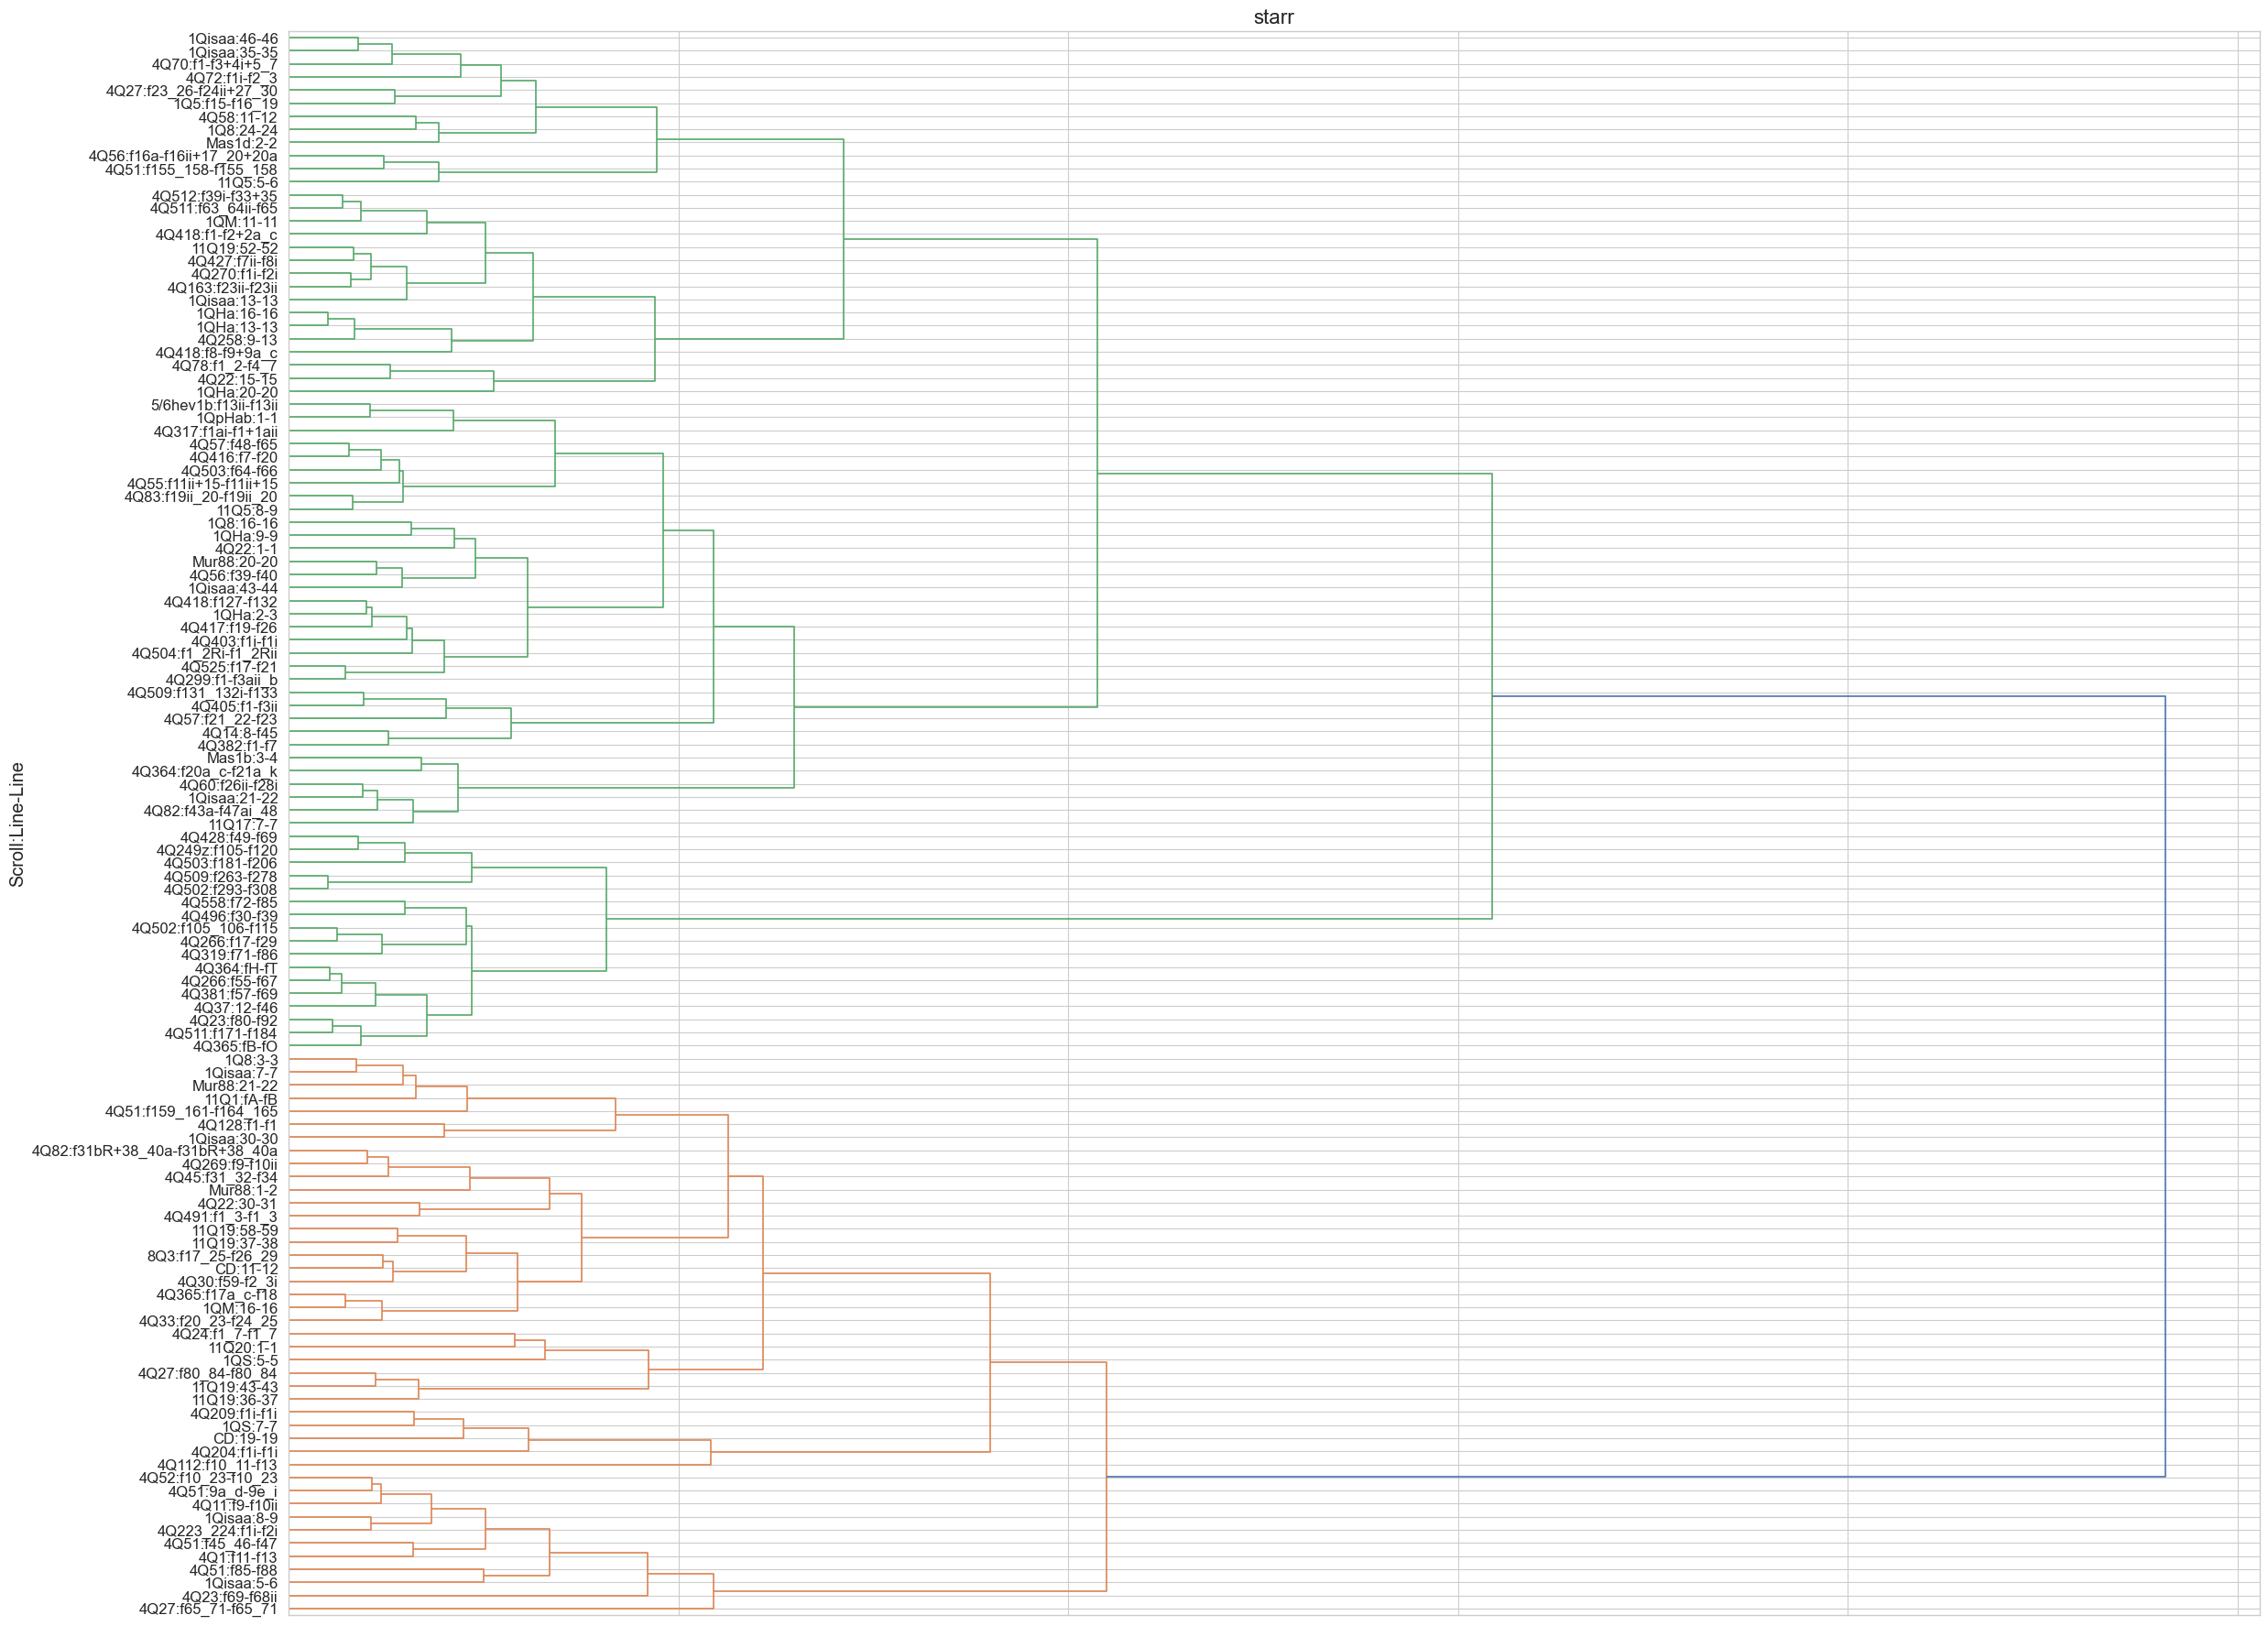

2024-06-03 23:39:58.993327 - calculate rand dasgupta_score
dasgupta_score=0.4334710743801653, dasgupta_score_rand=0.33114462809917355

2024-06-03 23:39:59.185177 - vectorizer_type='trigram',vectorizer_matrix.shape=(121, 4727)
2024-06-03 23:39:59.187764 - fitting AgglomerativeClustering
2024-06-03 23:39:59.213366 - getting linkage matrix
2024-06-03 23:39:59.213744 - calculate_dasgupta_score


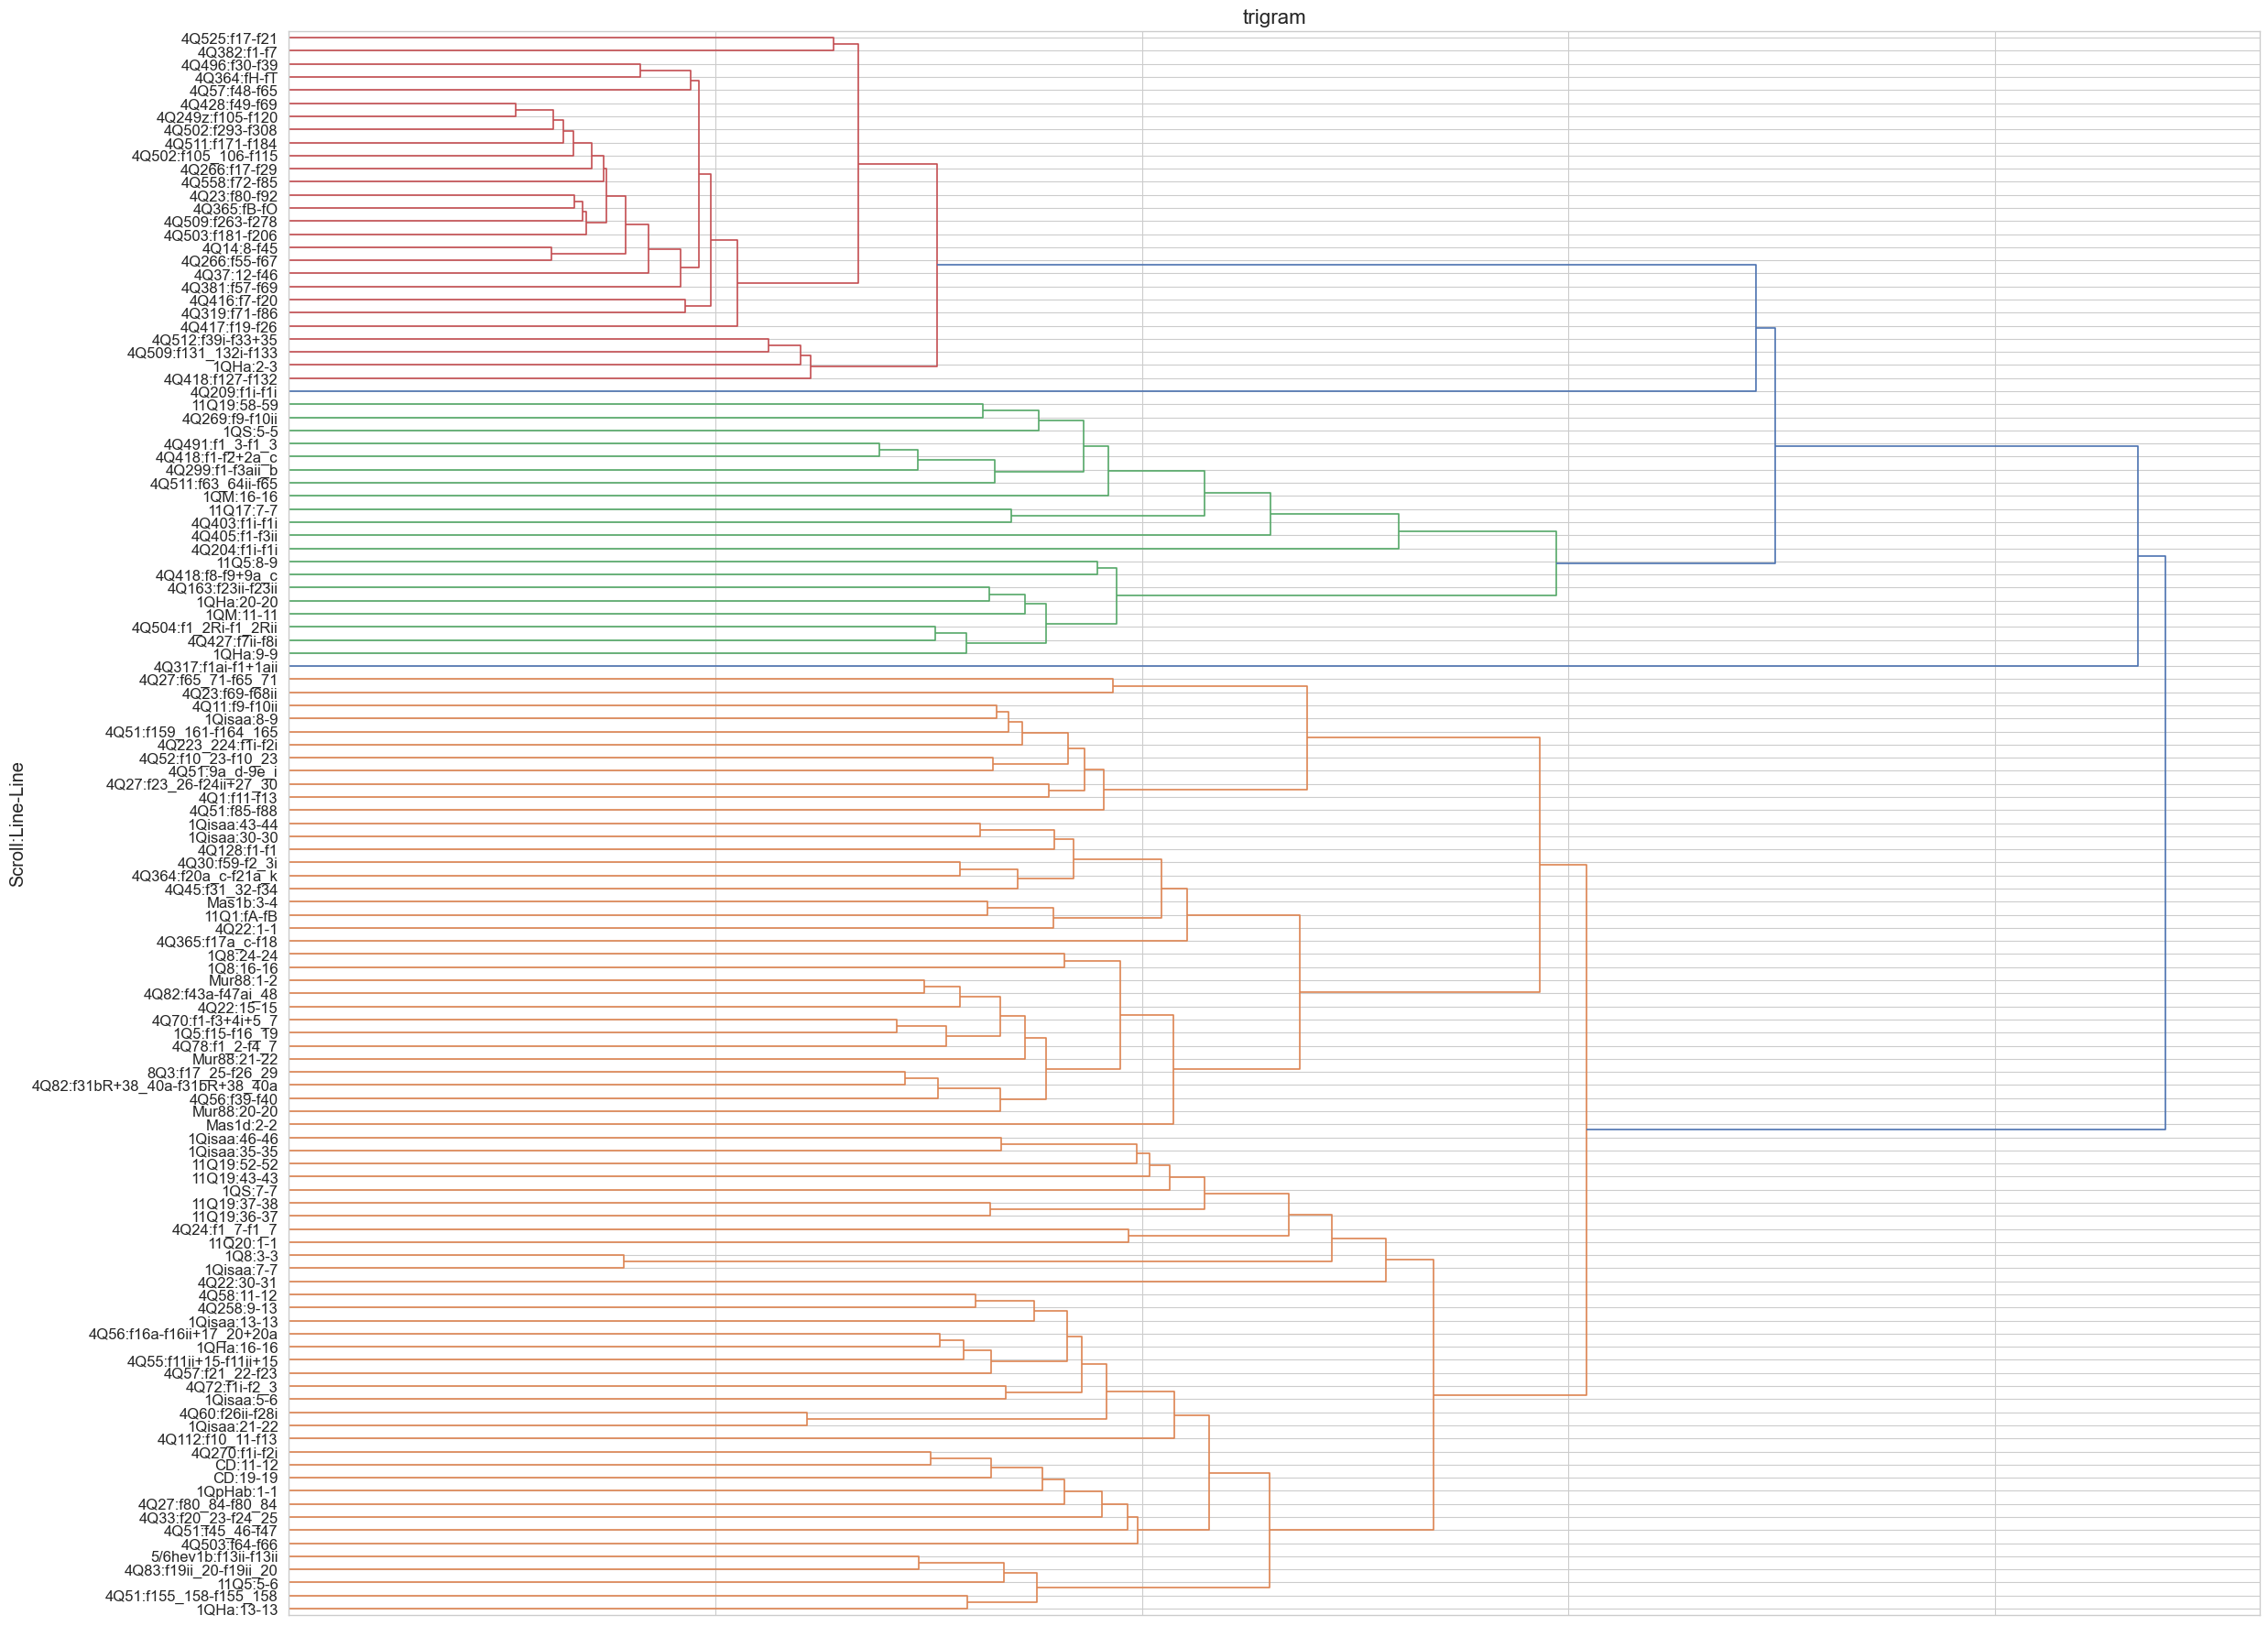

2024-06-03 23:40:00.818146 - calculate rand dasgupta_score
dasgupta_score=0.49634986225895306, dasgupta_score_rand=0.3318498622589531



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


bert:   0%|          | 0/121 [00:00<?, ?it/s]

2024-06-03 23:40:16.042024 - vectorizer_type='bert',vectorizer_matrix.shape=(121, 768)
2024-06-03 23:40:16.042254 - fitting AgglomerativeClustering
2024-06-03 23:40:16.051105 - getting linkage matrix
2024-06-03 23:40:16.051346 - calculate_dasgupta_score


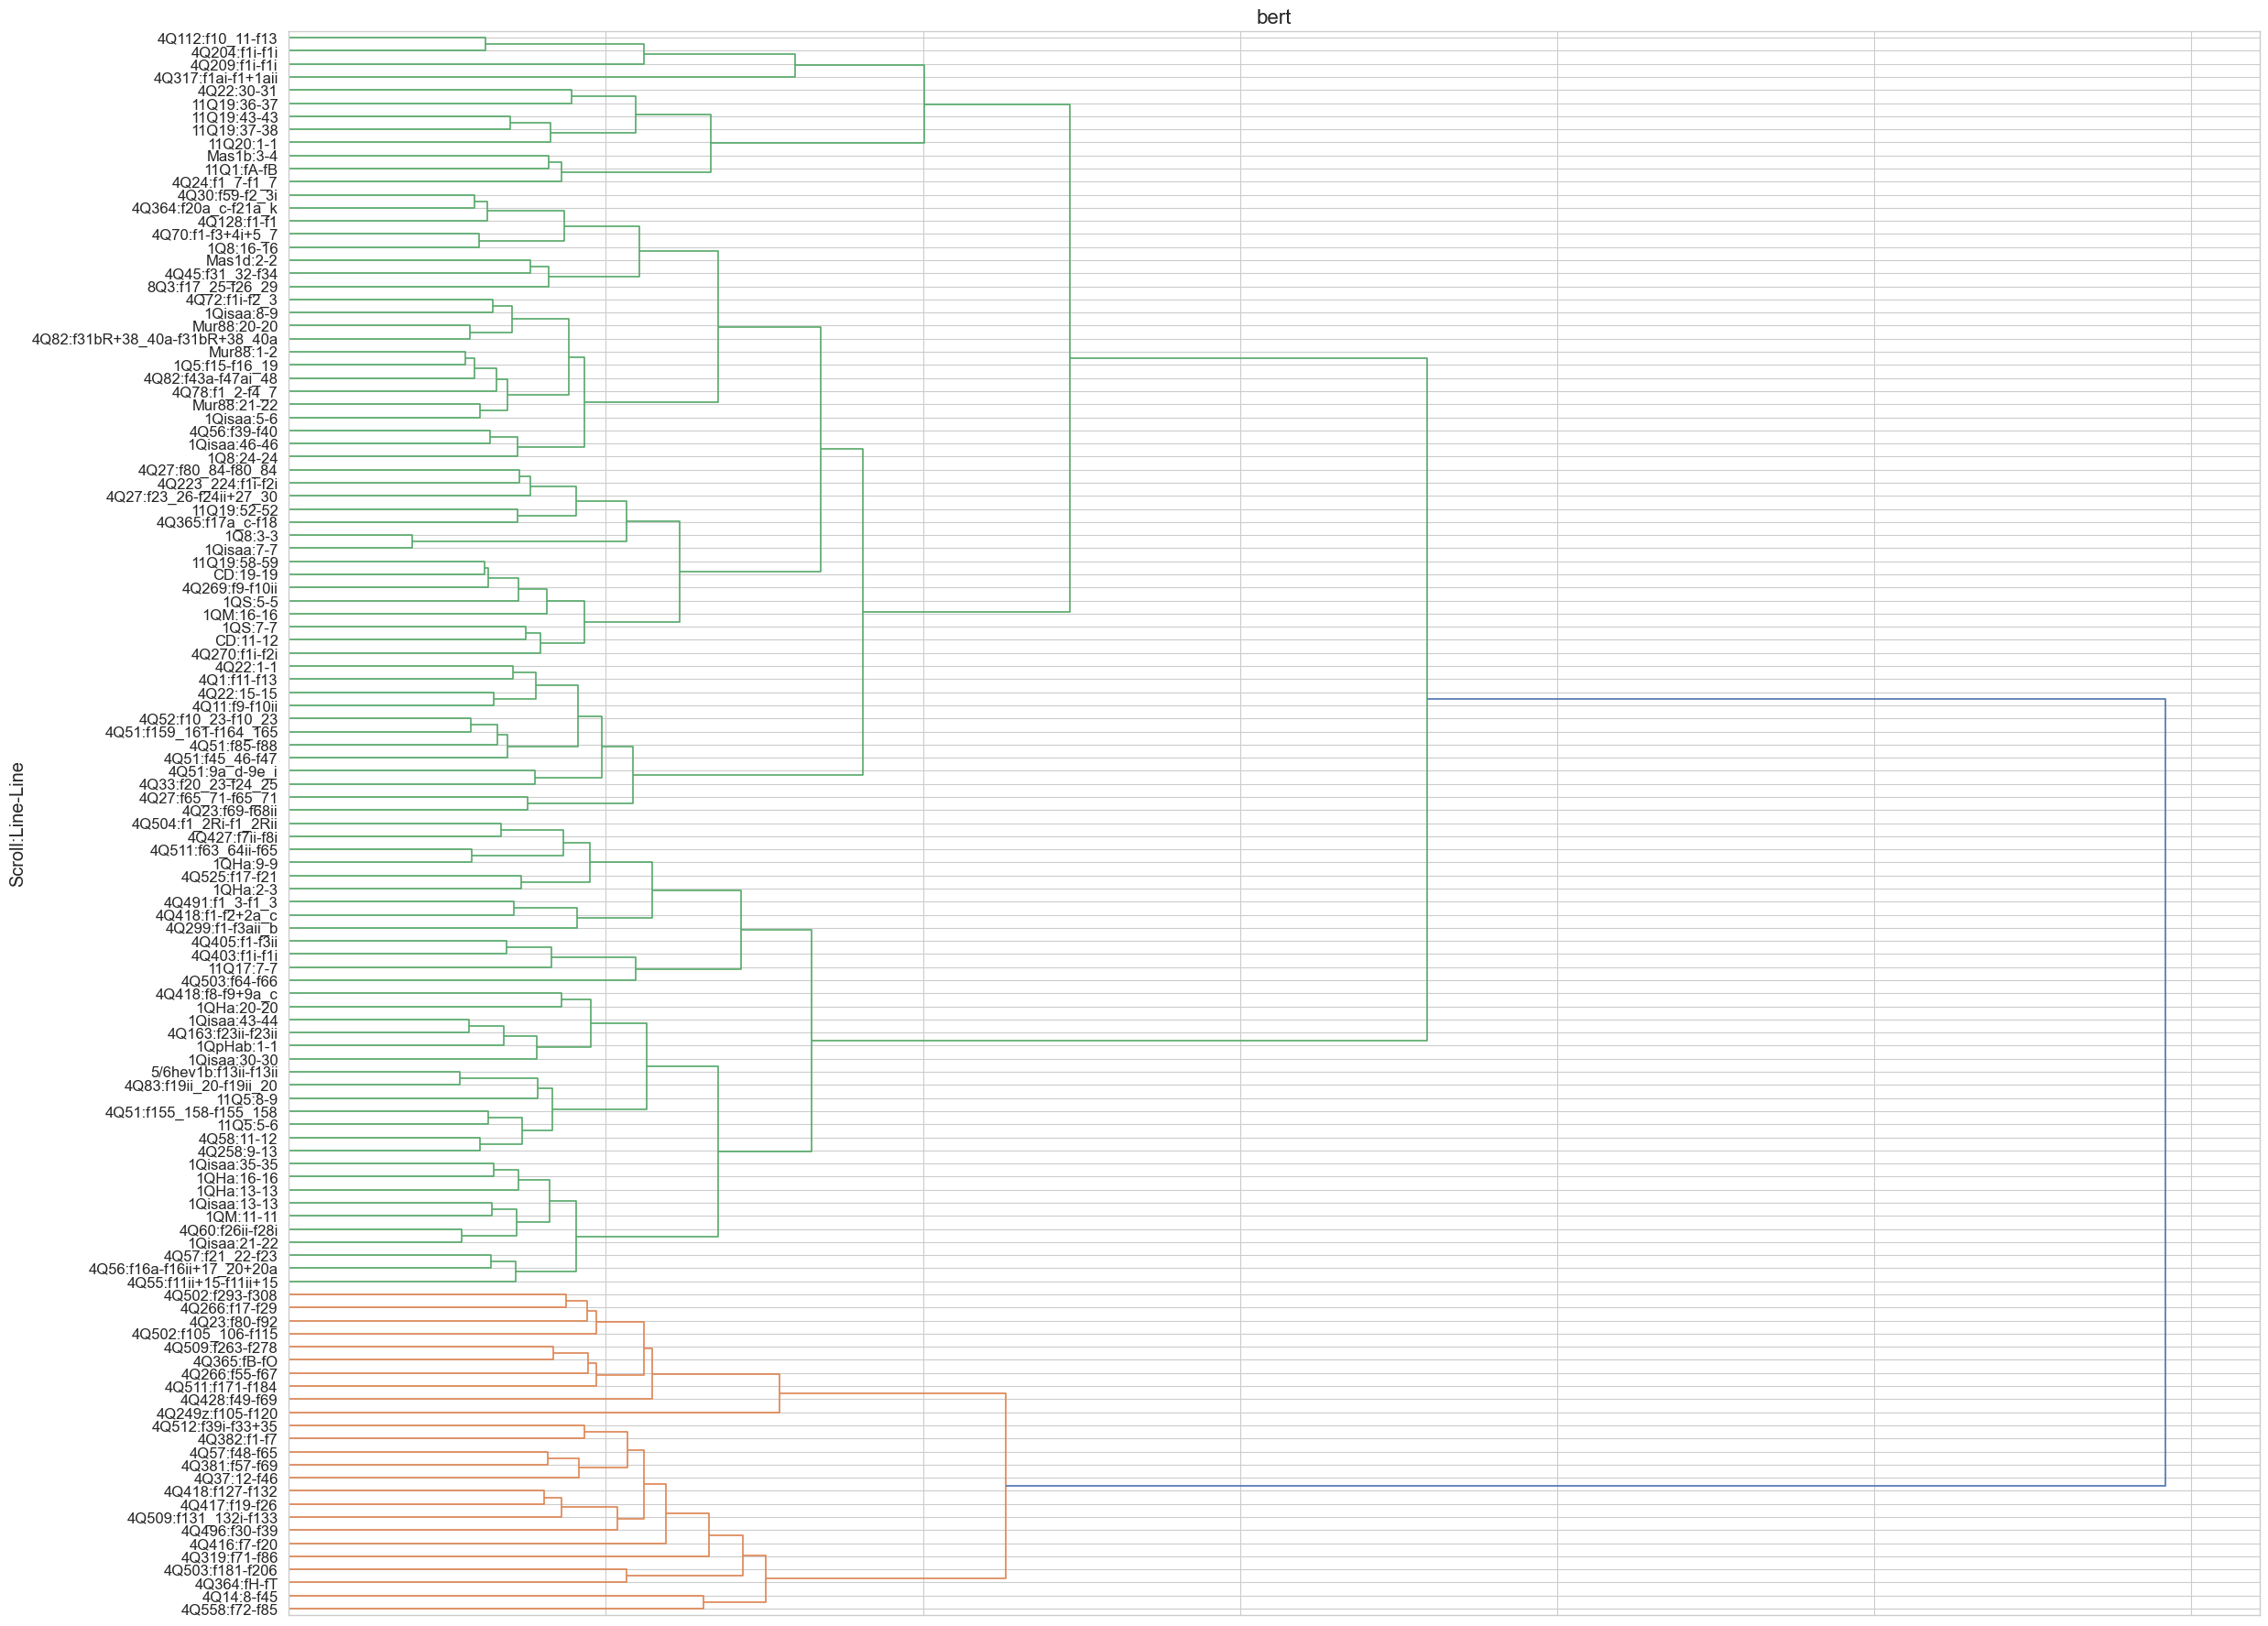

2024-06-03 23:40:17.434340 - calculate rand dasgupta_score
dasgupta_score=0.47623966942148765, dasgupta_score_rand=0.3307438016528926

2024-06-03 23:40:17.783415 - vectorizer_type='tfidf',vectorizer_matrix.shape=(121, 4375)
2024-06-03 23:40:17.783979 - fitting AgglomerativeClustering
2024-06-03 23:40:17.799251 - getting linkage matrix
2024-06-03 23:40:17.799494 - calculate_dasgupta_score


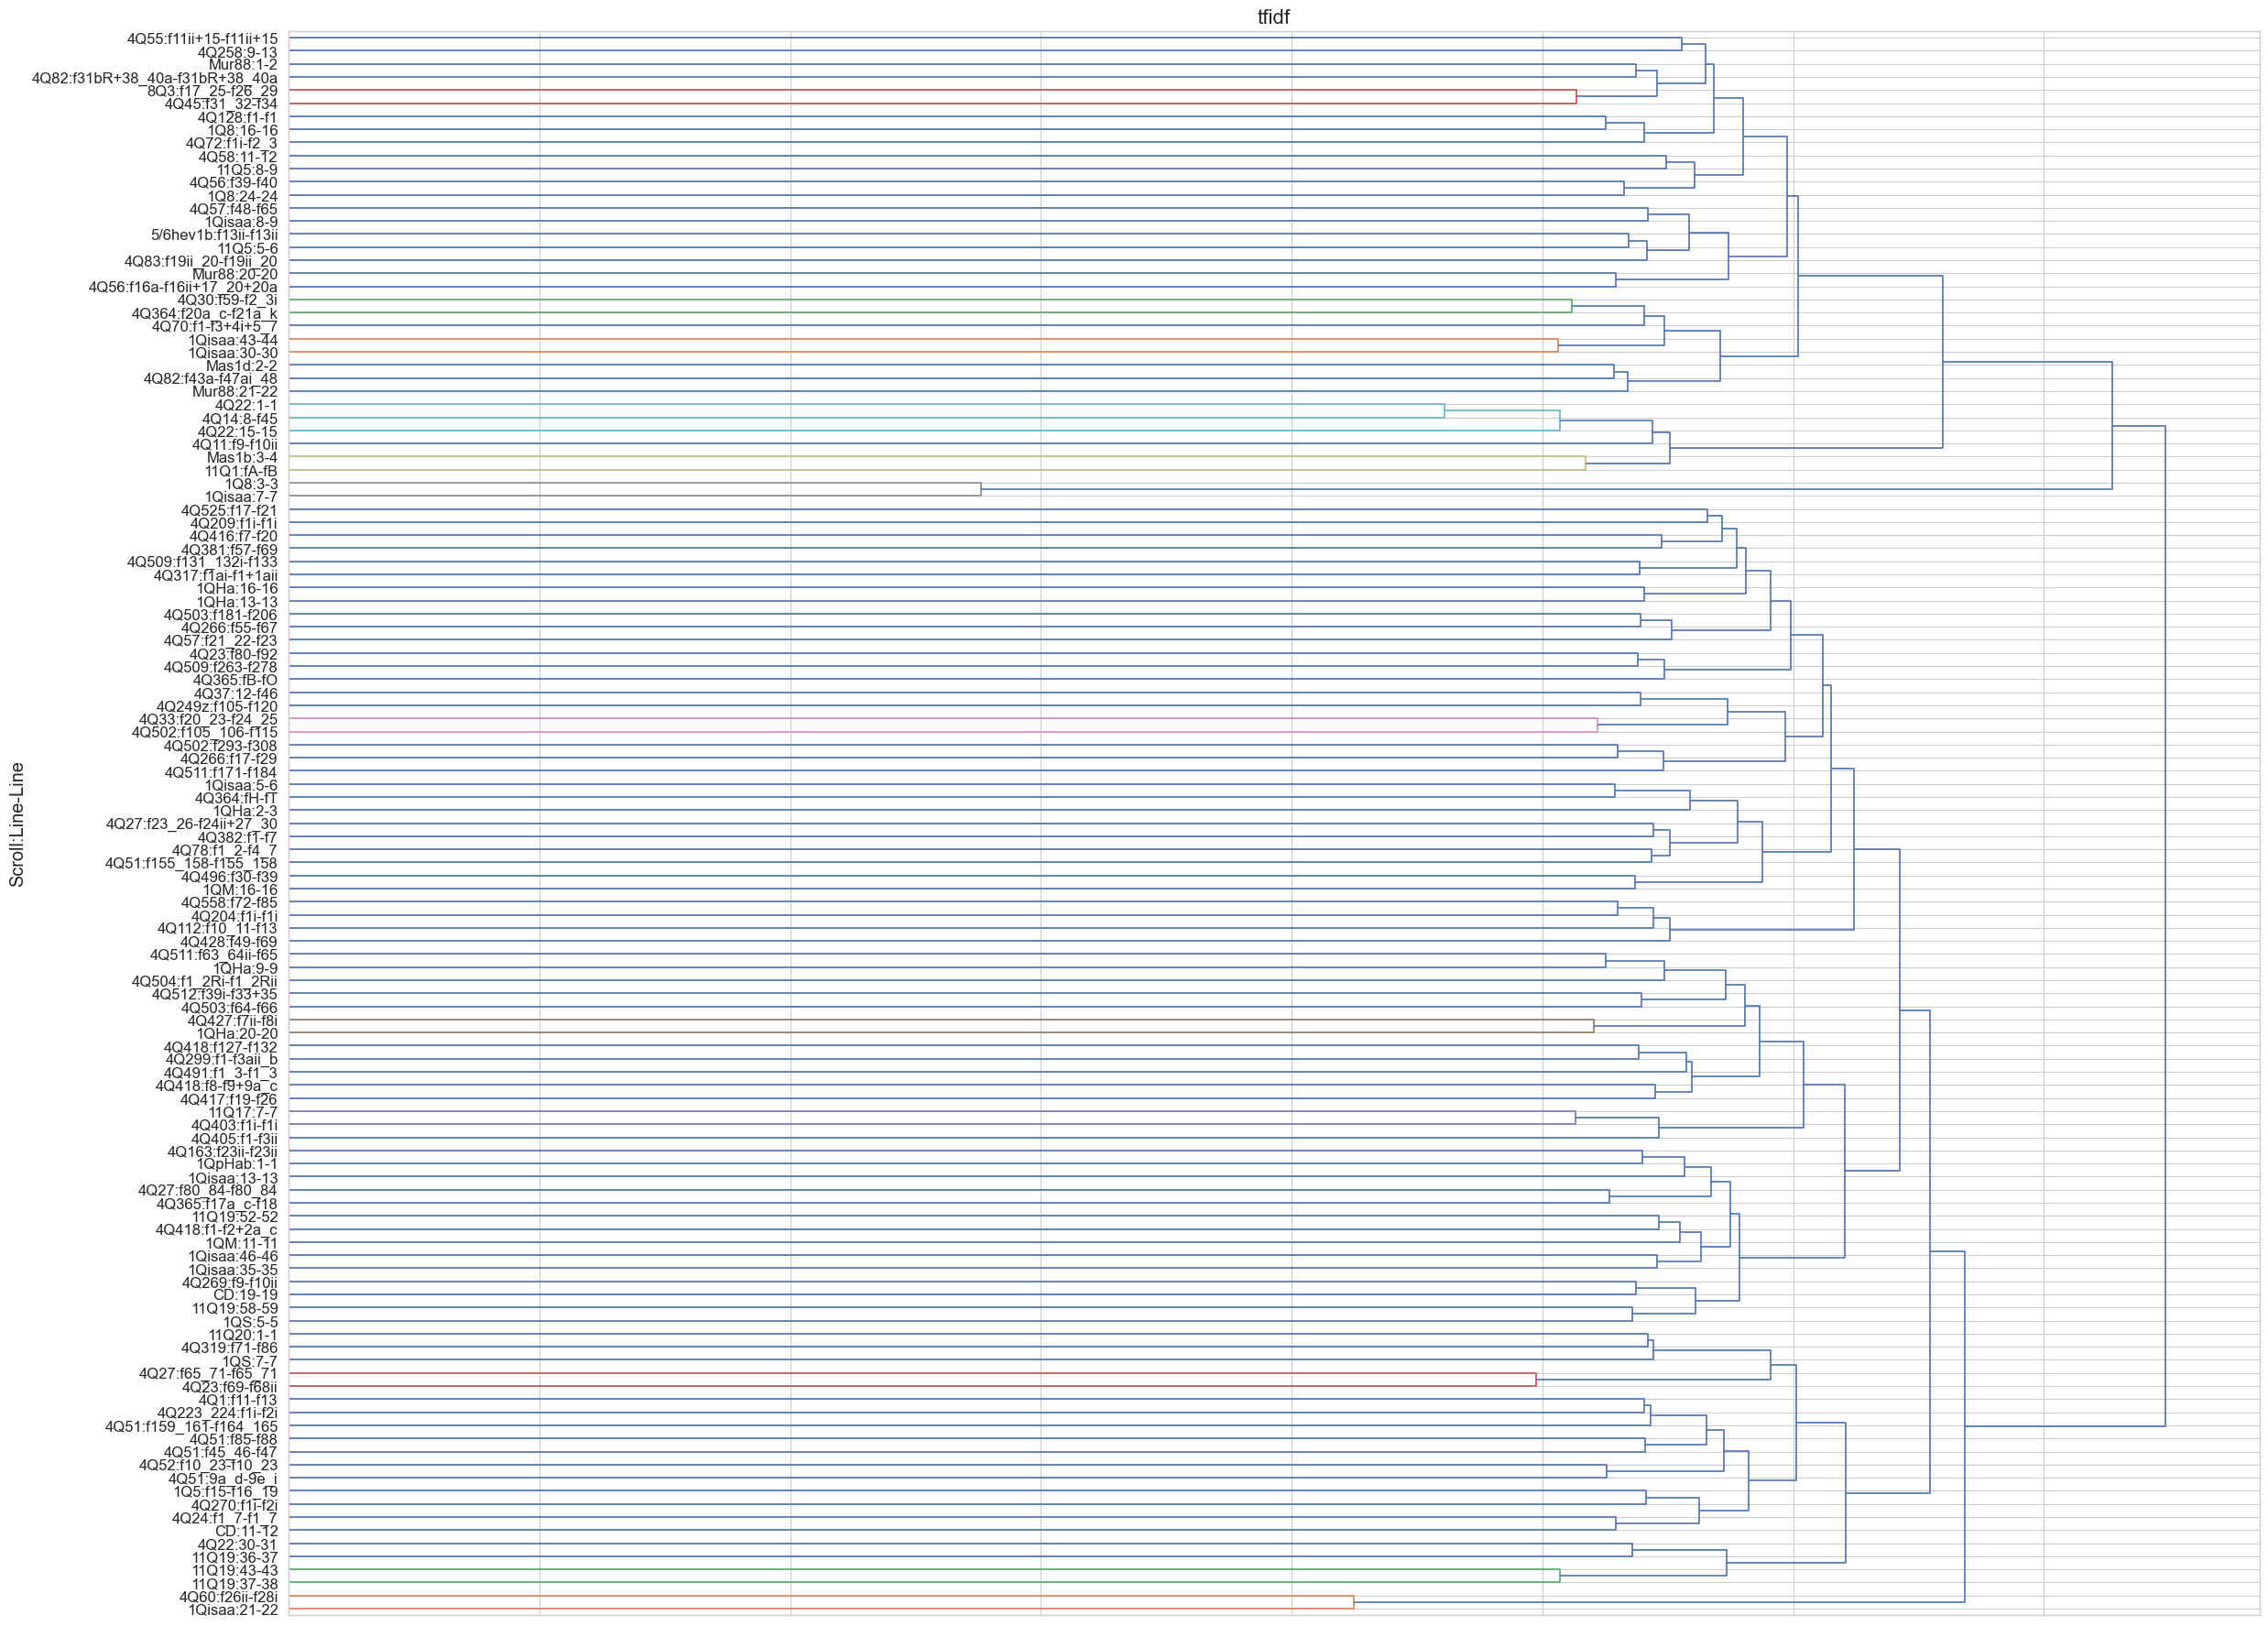

2024-06-03 23:40:19.209646 - calculate rand dasgupta_score
dasgupta_score=0.4840909090909091, dasgupta_score_rand=0.3273994490358126

2024-06-03 23:40:20.705073 - sampled_df.shape=(121, 25)


  0%|          | 0/4 [00:00<?, ?it/s]

2024-06-03 23:40:20.715058 - vectorizer_type='starr',vectorizer_matrix.shape=(121, 16)
2024-06-03 23:40:20.715351 - fitting AgglomerativeClustering
2024-06-03 23:40:20.717006 - getting linkage matrix
2024-06-03 23:40:20.717256 - calculate_dasgupta_score


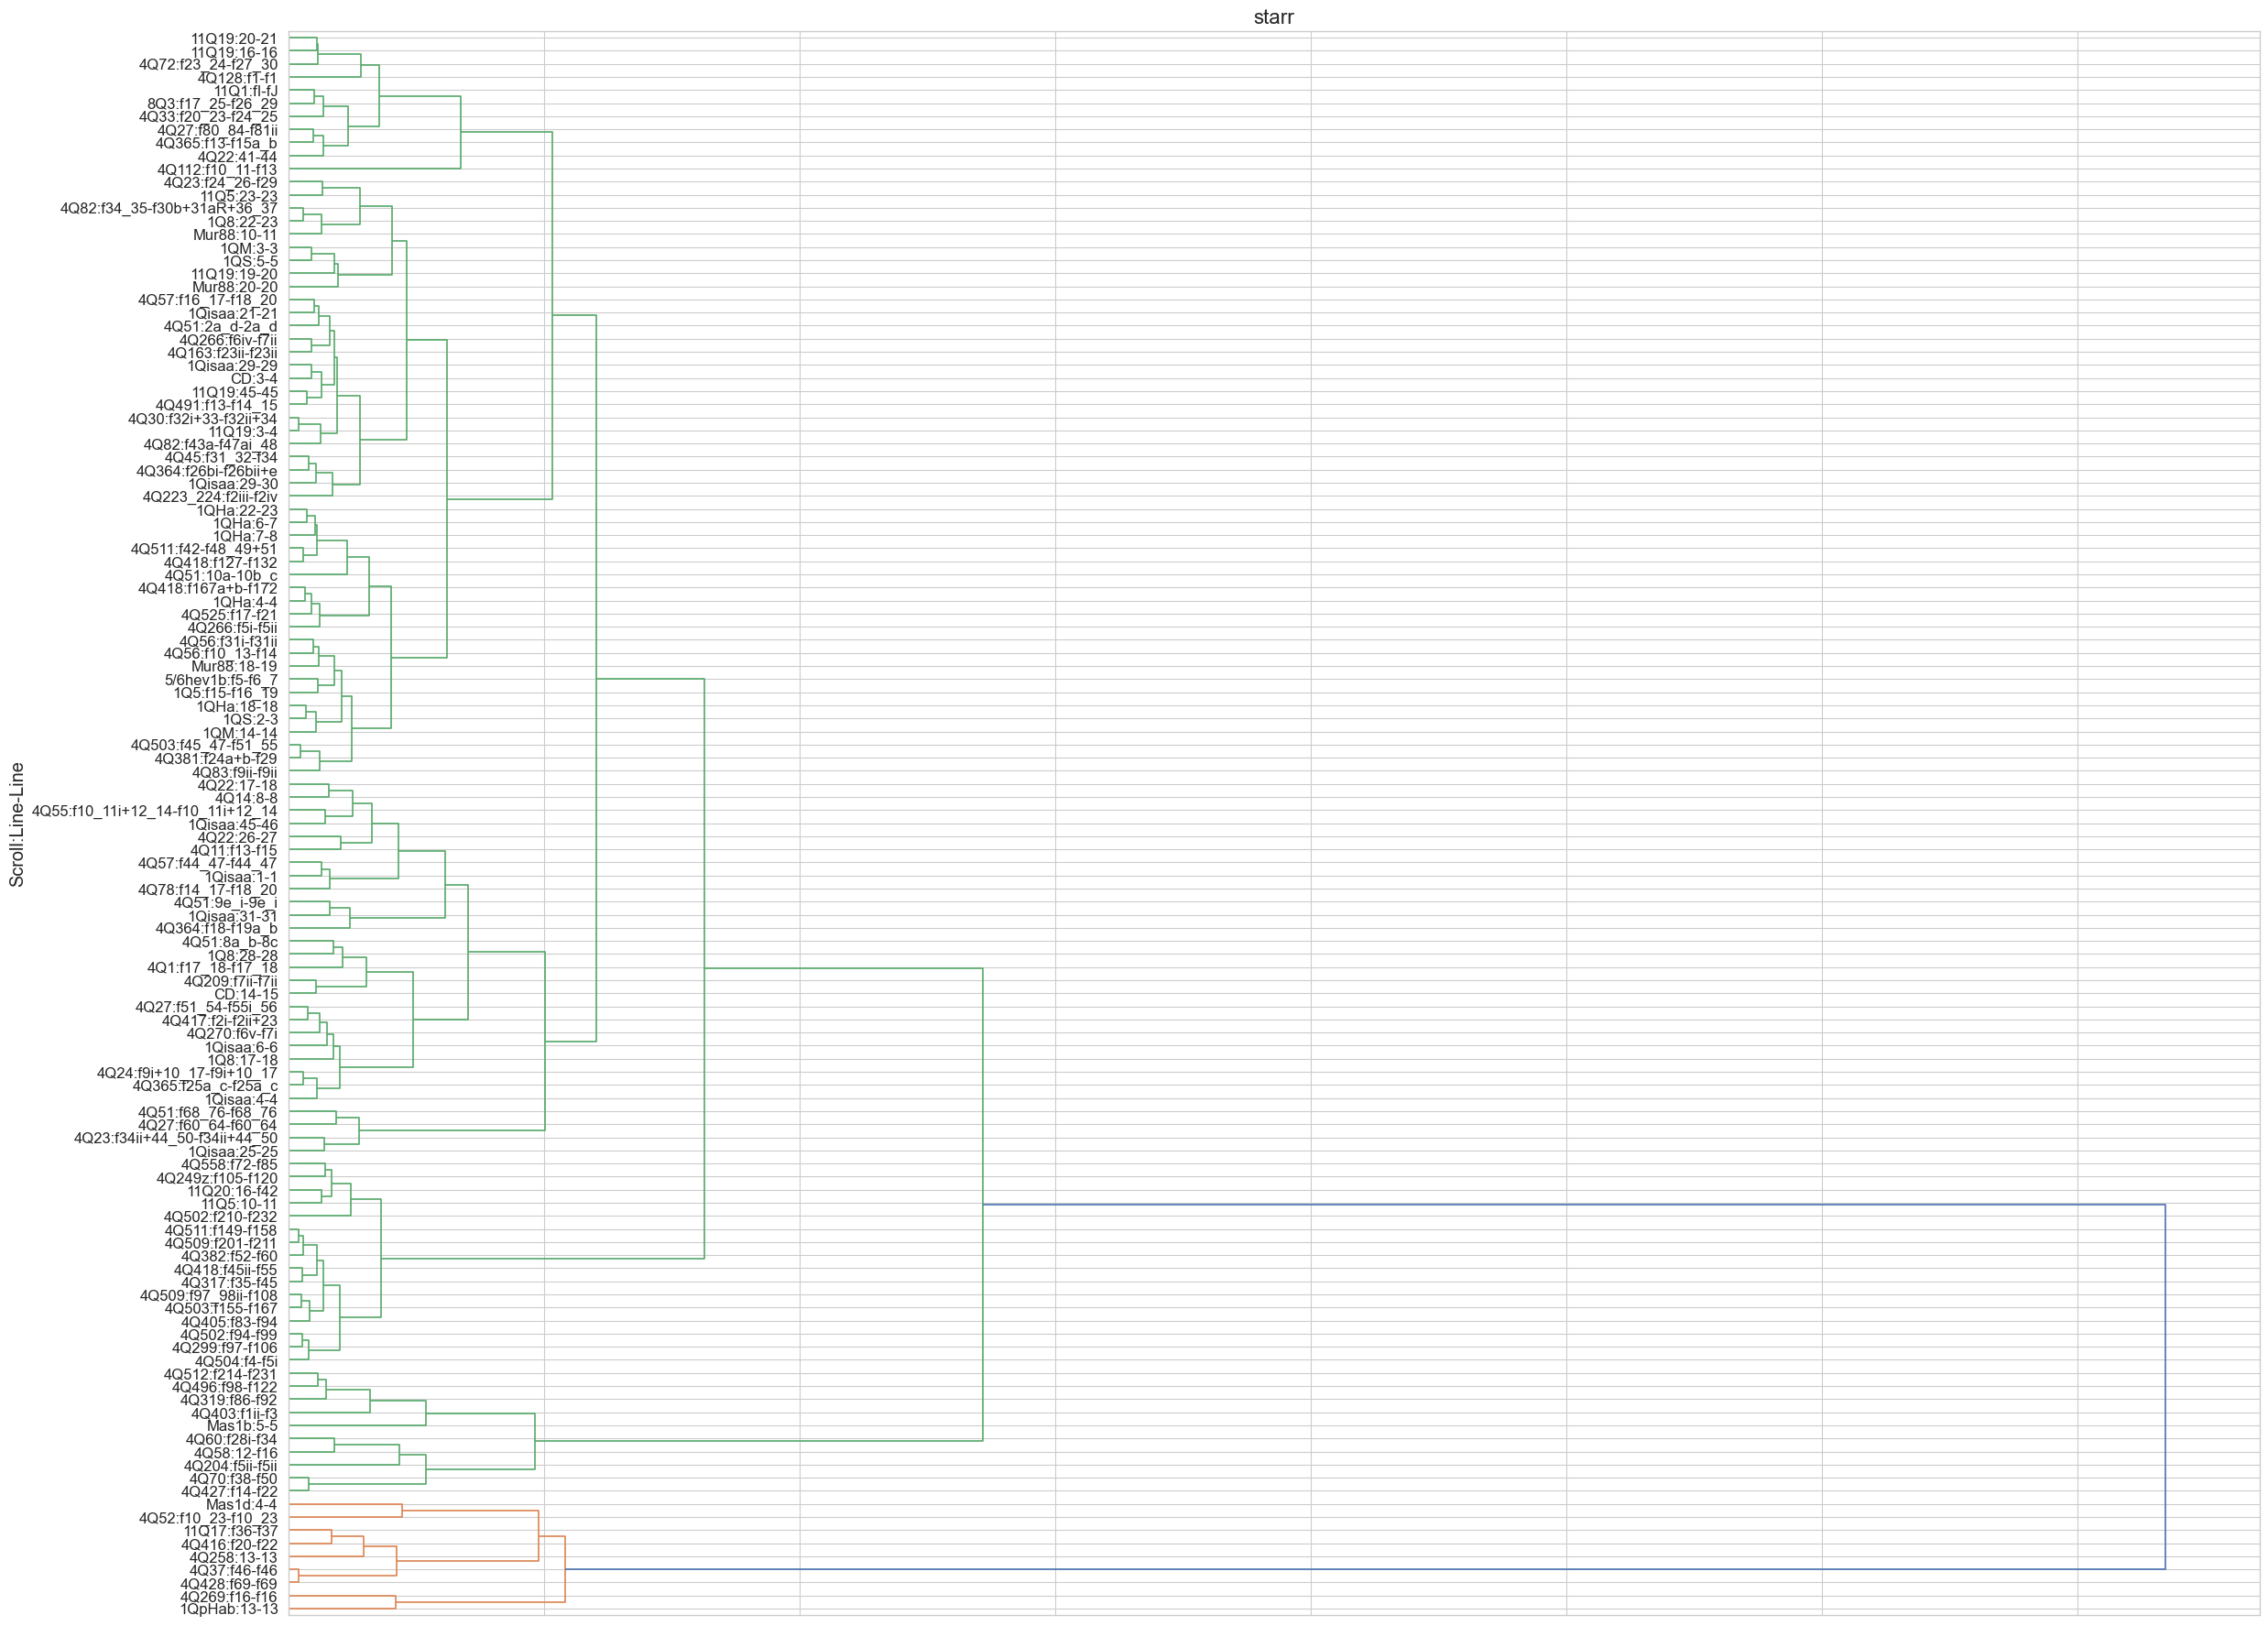

2024-06-03 23:40:22.187170 - calculate rand dasgupta_score


KeyboardInterrupt: 

In [72]:
# Define the number of cross-validation splits
NUM_CVS = 2
FRAC = 0.05
scores = []

vectorizers= ["starr","trigram", "bert", "tfidf"]

# Define the stratified sampling function
def stratified_sample(df, stratify_column, frac, random_state=None):
    df = df.reset_index().rename(columns={"index": "original_index"})
    grouped = df.groupby(stratify_column)
    stratified_df = grouped.apply(lambda x: x.sample(frac=frac, random_state=random_state)).reset_index(drop=True)
    stratified_df = stratified_df.sort_values(by="original_index").drop(columns=["original_index"])
    return stratified_df

for i in tqdm(range(NUM_CVS)):
    # Sample 90% of the data
    sampled_df = stratified_sample(df, 'book', frac=FRAC, random_state=42 + i)
    print(f"{datetime.now()} - {sampled_df.shape=}")
    
    for vectorizer_type in tqdm(vectorizers):
        vectorizer_matrix = vectorize_text(sampled_df, "text", vectorizer_type)
        print(f"{datetime.now()} - {vectorizer_type=},{vectorizer_matrix.shape=}")
        
        dasgupta_score = get_clusters_scores(sampled_df, "sentence_path", vectorizer_matrix, "ward", plot=True, metadata={"vectorizer_type":vectorizer_type})
        dasgupta_score_rand = get_random_clusters_score(sampled_df, "sentence_path", vectorizer_matrix, "ward")
        print(f"{dasgupta_score=}, {dasgupta_score_rand=}\n")
        
        scores.append({"vectorizer": vectorizer_type, "dasgupta_score": dasgupta_score, "dasgupta_score_rand":dasgupta_score_rand, "cv": i})

# Convert scores to a DataFrame for easier analysis
scores_df = pd.DataFrame(scores)

TODO:
3. add starr features, remove Bow.
4. Understand what is the heavy lifting and make it faster.
2. See if im doing bert the right way/ compare other models. https://huggingface.co/docs/transformers/en/autoclass_tutorial
1. Understand dgapudsta score




2024-05-30 20:38:10.244411 - fitting AgglomerativeClustering
2024-05-30 20:38:10.245992 - getting linkage matrix


<Axes: >

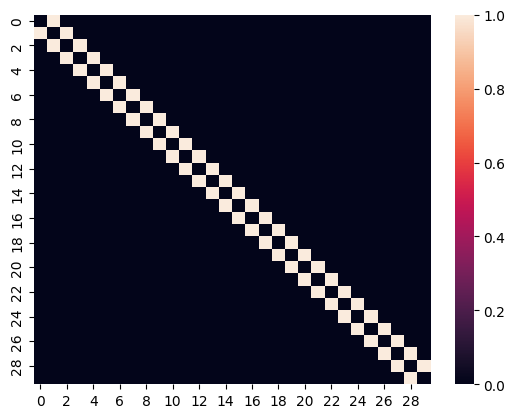

In [66]:
def get_linkage_matrix(model):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in (enumerate(model.children_)):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    return linkage_matrix

linkage_criterion="ward"
if sp.issparse(vectorizer_matrix):
    vectorizer_matrix = vectorizer_matrix.toarray()
sample_names = df_sampled["sentence_path"].to_list()
model = sk.AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage=linkage_criterion
)
print(f"{datetime.now()} - fitting AgglomerativeClustering")
model.fit_predict(vectorizer_matrix)
adjacency_matrix = np.zeros((len(sample_names), len(sample_names)))
for i in range(0, adjacency_matrix.shape[0] - 1):
    adjacency_matrix[i, i + 1] = 1
    adjacency_matrix[i + 1, i] = 1
print(f"{datetime.now()} - getting linkage matrix")
import seaborn as sns
sns.heatmap(adjacency_matrix)
# linkage_matrix = get_linkage_matrix(model)
# score = calculate_dasgupta_score(adjacency_matrix, linkage_matrix)

In [47]:
vectorizers= ["trigram", "BOW", "bert", "tfidf"]
pd.DataFrame([scores], columns = vectorizers)

,trigram,BOW,bert,tfidf
0,0.354023,0.332184,0.281609,0.357471


In [ ]:


# Function to select and apply vectorizer
def vectorize_text(corpus, method='tfidf'):
    if method == 'tfidf':
        vectorizer = TfidfVectorizer(ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1)
    elif method == 'count':
        vectorizer = CountVectorizer(ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1)
    elif method == 'hashing':
        vectorizer = HashingVectorizer(ngram_range=(1, 1), analyzer='word', n_features=1000000)
    else:
        raise ValueError(f"Unknown vectorization method: {method}")
    X = vectorizer.fit_transform(corpus)
    return X


# Function for plotting
def plot_tsne(X, labels, clustering_label, sections, title):
    tsne = TSNE(n_components=2, random_state=0, perplexity=25)
    components = tsne.fit_transform(X.toarray())

    plt.figure(figsize=(20, 15))
    scatter = sns.scatterplot(x=components[:, 0], y=components[:, 1],
                              hue=labels, palette='pastel',
                              style=sections, s=100)

    for i, text in enumerate(clustering_label):
        plt.text(components[i, 0], components[i, 1], text,
                 fontdict=dict(color='black', size=10), ha='right')

    plt.title(title)
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()


In [152]:
df_by_book["len_words"] = df_by_book["processed_text"].str.split(" ").str.len()
df_by_book[df_by_book["len_words"] >= 300]
df_by_book_non_nulls = df_by_book[~(df_by_book[clustering_label].isna())]
df_by_sentence = convert_df_by_book_to_df_by_sentence(df_by_book_non_nulls, "processed_text", 500)

In [296]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from transformers import BertModel, BertTokenizer
import torch
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('onlplab/alephbert-base')
# Load pre-trained model
BERT_MODEL = BertModel.from_pretrained('onlplab/alephbert-base')


def vectorize_text(corpus, method='tfidf'):
    if method == 'tfidf':
        vectorizer = TfidfVectorizer(max_df=1.0, min_df=1)
    elif method == 'trigram':
        vectorizer = CountVectorizer(ngram_range=(3, 3), analyzer='char', max_df=1.0, min_df=1)
    elif method == 'bert':
        # BERT embeddings
        BERT_MODEL.eval()
        with torch.no_grad():
            inputs = tokenizer(corpus.tolist(), padding=True, truncation=True, return_tensors="pt")
            outputs = BERT_MODEL(**inputs)
        return outputs.last_hidden_state.mean(dim=1).numpy()
    else:
        raise ValueError(f"Unknown vectorization method: {method}")
    X = vectorizer.fit_transform(corpus)
    return X


def apply_clustering(X, num_of_clusters, method='kmeans'):
    if type(X) != np.ndarray:
        X = X.toarray()
    if method == 'kmeans':
        clustering = KMeans(n_clusters=5).fit(X)
        labels_pred = clustering.labels_
    elif method == 'gmm':
        clustering = GaussianMixture(n_components=num_of_clusters).fit(X)
        labels_pred = clustering.predict(X)
    elif method == 'spectral_clustering':
        # affinity = pairwise_kernels(X, metric='nearest_neighbors',n_neighbors=10)
        # clustering = spectral_clustering(affinity=affinity, n_clusters=num_of_clusters, assign_labels="discretize", random_state=0)
        clustering = clustering = SpectralClustering(n_clusters=num_of_clusters, random_state=42,
                                                     affinity='nearest_neighbors', n_neighbors=10).fit(X)
        labels_pred = clustering.labels_
    else:
        raise ValueError(f"Unknown clustering method: {method}")
    return labels_pred


from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, mutual_info_score
from sklearn.metrics.cluster import contingency_matrix


def evaluate_clustering(X, labels_true, labels_pred):
    if type(X) != np.ndarray:
        X = X.toarray()

    silhouette = silhouette_score(X, labels_pred, metric='euclidean')
    davies_bouldin = davies_bouldin_score(X, labels_pred)
    adjusted_rand = adjusted_rand_score(labels_true, labels_pred)
    mutual_info = mutual_info_score(labels_true, labels_pred)
    contingency_mtx = contingency_matrix(labels_true, labels_pred)
    jaccard = np.sum(np.amax(contingency_mtx, axis=0)) / np.sum(contingency_mtx)

    # Calculate the Dunn index using an external library or a custom implementation

    return {
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': davies_bouldin,
        'Adjusted Rand Index': adjusted_rand,
        'Mutual Information': mutual_info,
        'Jaccard Index': jaccard
    }



/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertModel were not initialized from the model checkpoint at onlplab/alephbert-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Silhouette Score
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. The formula for the Silhouette Score for a single sample is:
$$ s = \frac{b - a}{\max(a, b)} $$
where $a$ is the mean distance to the other samples in the same cluster (cohesion), and $b$ is the mean distance to the samples in the nearest cluster (separation). A higher Silhouette Score is better, with a maximum of 1 indicating perfect clustering.

### Davies-Bouldin Index
The Davies-Bouldin Index evaluates the average similarity between each cluster and its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. The formula is:
$$ DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right) $$
where $\sigma$ is the average distance of all points in the cluster to the cluster centroid $c$, and $d(c_i, c_j)$ is the distance between centroids $c_i$ and $c_j$. A lower Davies-Bouldin Index indicates better clustering.

### Adjusted Rand Index
The Adjusted Rand Index is a measure of the similarity between two data clusterings, corrected for chance. It has a maximum of 1 and can be less than 0. The formula for the Adjusted Rand Index is:
$$ ARI = \frac{\sum_{ij} \binom{n_{ij}}{2} - [\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}}{\frac{1}{2} [\sum_i \binom{a_i}{2} + \sum_j \binom{b_j}{2}] - [\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}] / \binom{n}{2}} $$
where $n_{ij}$ is the number of objects in both clusters $i$ and $j$, $a_i$ is the number of objects in cluster $i$, and $b_j$ is the number of objects in cluster $j$. Higher values are better.

### Mutual Information
Mutual Information measures the amount of information shared between two clusterings, reflecting how much knowing one of these clusterings reduces uncertainty about the other. The formula is:
$$ MI = \sum_{k,l} P(k,l) \log \frac{P(k,l)}{P(k)P(l)} $$
where $P(k,l)$ is the joint probability distribution function of clusterings $k$ and $l$, and $P(k)$ and $P(l)$ are the marginal probability distributions. Higher values indicate more shared information.

### Jaccard Index
The Jaccard Index, or Jaccard similarity coefficient, measures similarity between finite sample sets, and is defined as the size of the intersection divided by the size of the union of the sample sets:
$$ J(A,B) = \frac{|A \cap B|}{|A \cup B|} $$
where $A$ and $B$ are sets of labels. Higher values are better, indicating a greater overlap between the clusters compared to the total size.


### Supervised

In [42]:
df_sampled = df.sample(frac=1, random_state=42)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df_sampled[clustering_label])
vectorizer_method = 'tfidf'  # Change to 'count' or 'hashing' as needed
X = vectorize_text(df_sampled['text'], method=vectorizer_method)
X_train, X_test, y_train, y_test = train_test_split(X, encoded_labels, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Compute Jaccard Index
jaccard_index = jaccard_score(y_test, y_pred, average='macro')
rand_index = adjusted_rand_score(y_test, y_pred)
print(f"Jaccard Index: {jaccard_index}")

unique_classes = sorted(set(y_test))
target_names = [label_encoder.inverse_transform([cls])[0] for cls in unique_classes]

# Print classification report
# print(classification_report(y_test, y_pred, labels=unique_classes, target_names=target_names))



TypeError: vectorize_text() got an unexpected keyword argument 'method'

In [ ]:
# Plotting
plot_title = f'Text Clustering by Book ({vectorizer_method.upper()})'
plot_tsne(X, df_sampled['cluster'], df_sampled[clustering_label], df_sampled['section'], plot_title)

In [58]:
jaccard_index = compute_jaccard_index(encoded_labels, clusters)
print(f"Jaccard Index: {jaccard_index}")


Jaccard Index: 0.018000000000000002


In [61]:
import random

random.shuffle(clusters)
jaccard_index = compute_jaccard_index(encoded_labels, clusters)
print(f"Jaccard Index: {jaccard_index}")


Jaccard Index: 0.012380952380952381


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


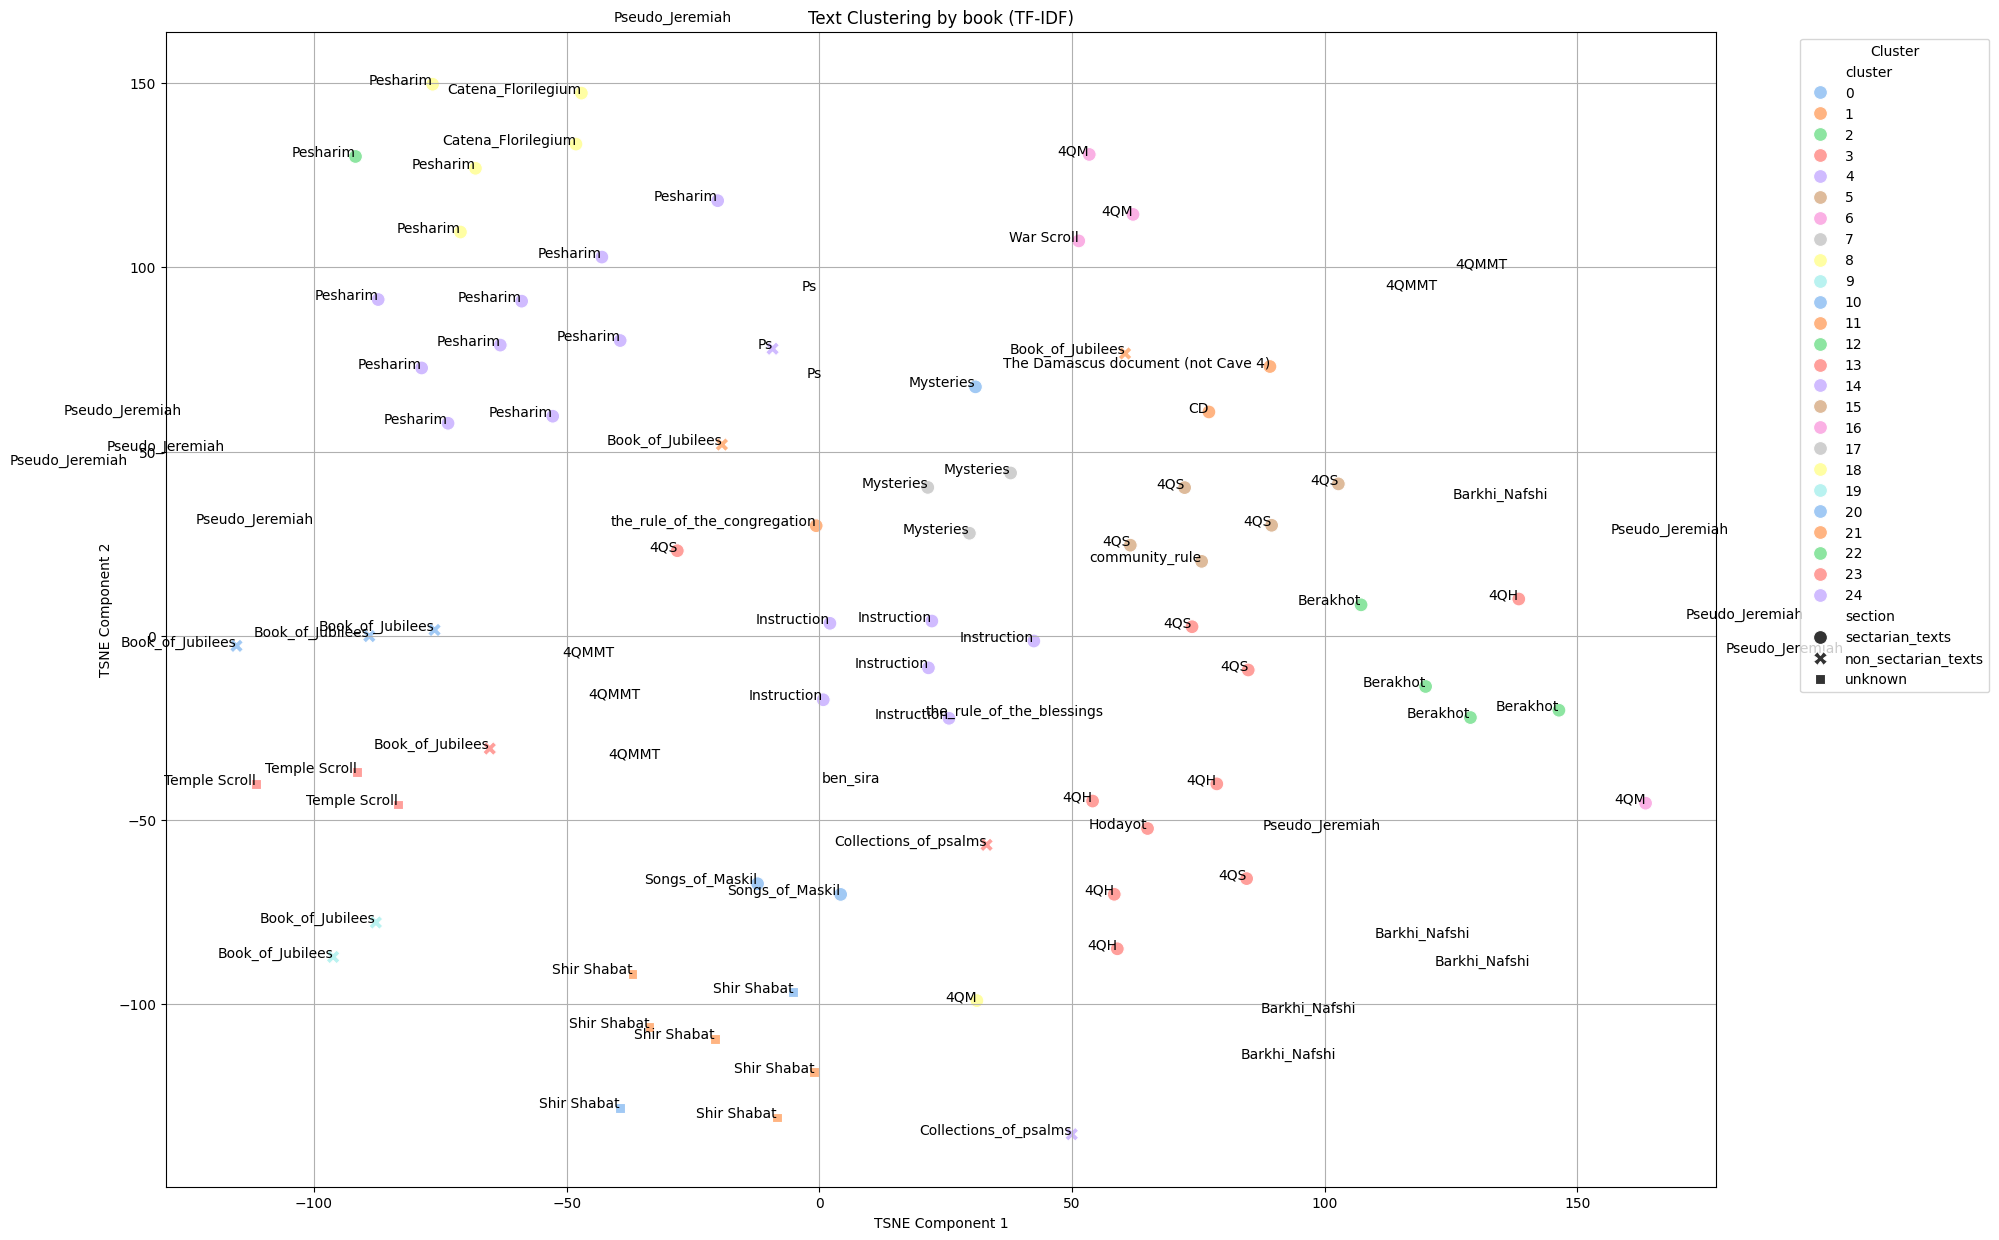

In [62]:

df_sampled = df_by_book_non_nulls.sample(frac=1, random_state=42)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_sampled['processed_text'])

# Step 2: Clustering
kmeans = KMeans(n_clusters=df_sampled[clustering_label].nunique(), random_state=0)
clusters = kmeans.fit_predict(X)
df_sampled['cluster'] = clusters

# Visualization
tsne = TSNE(n_components=2, random_state=0, perplexity=25)
components = tsne.fit_transform(X.toarray())

# Plot using seaborn for the scatter plot
plt.figure(figsize=(20, 15))
scatter = sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df_sampled['cluster'], palette='pastel',
                          style=df_sampled['section'], s=100)

# Adding text labels
for i, text in enumerate(df_sampled[clustering_label]):
    plt.text(components[i, 0], components[i, 1], text, fontdict=dict(color='black', size=10), ha='right')

plt.title('Text Clustering by book (TF-IDF)')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
# plt.savefig("tsne_by_book.png")
plt.show()

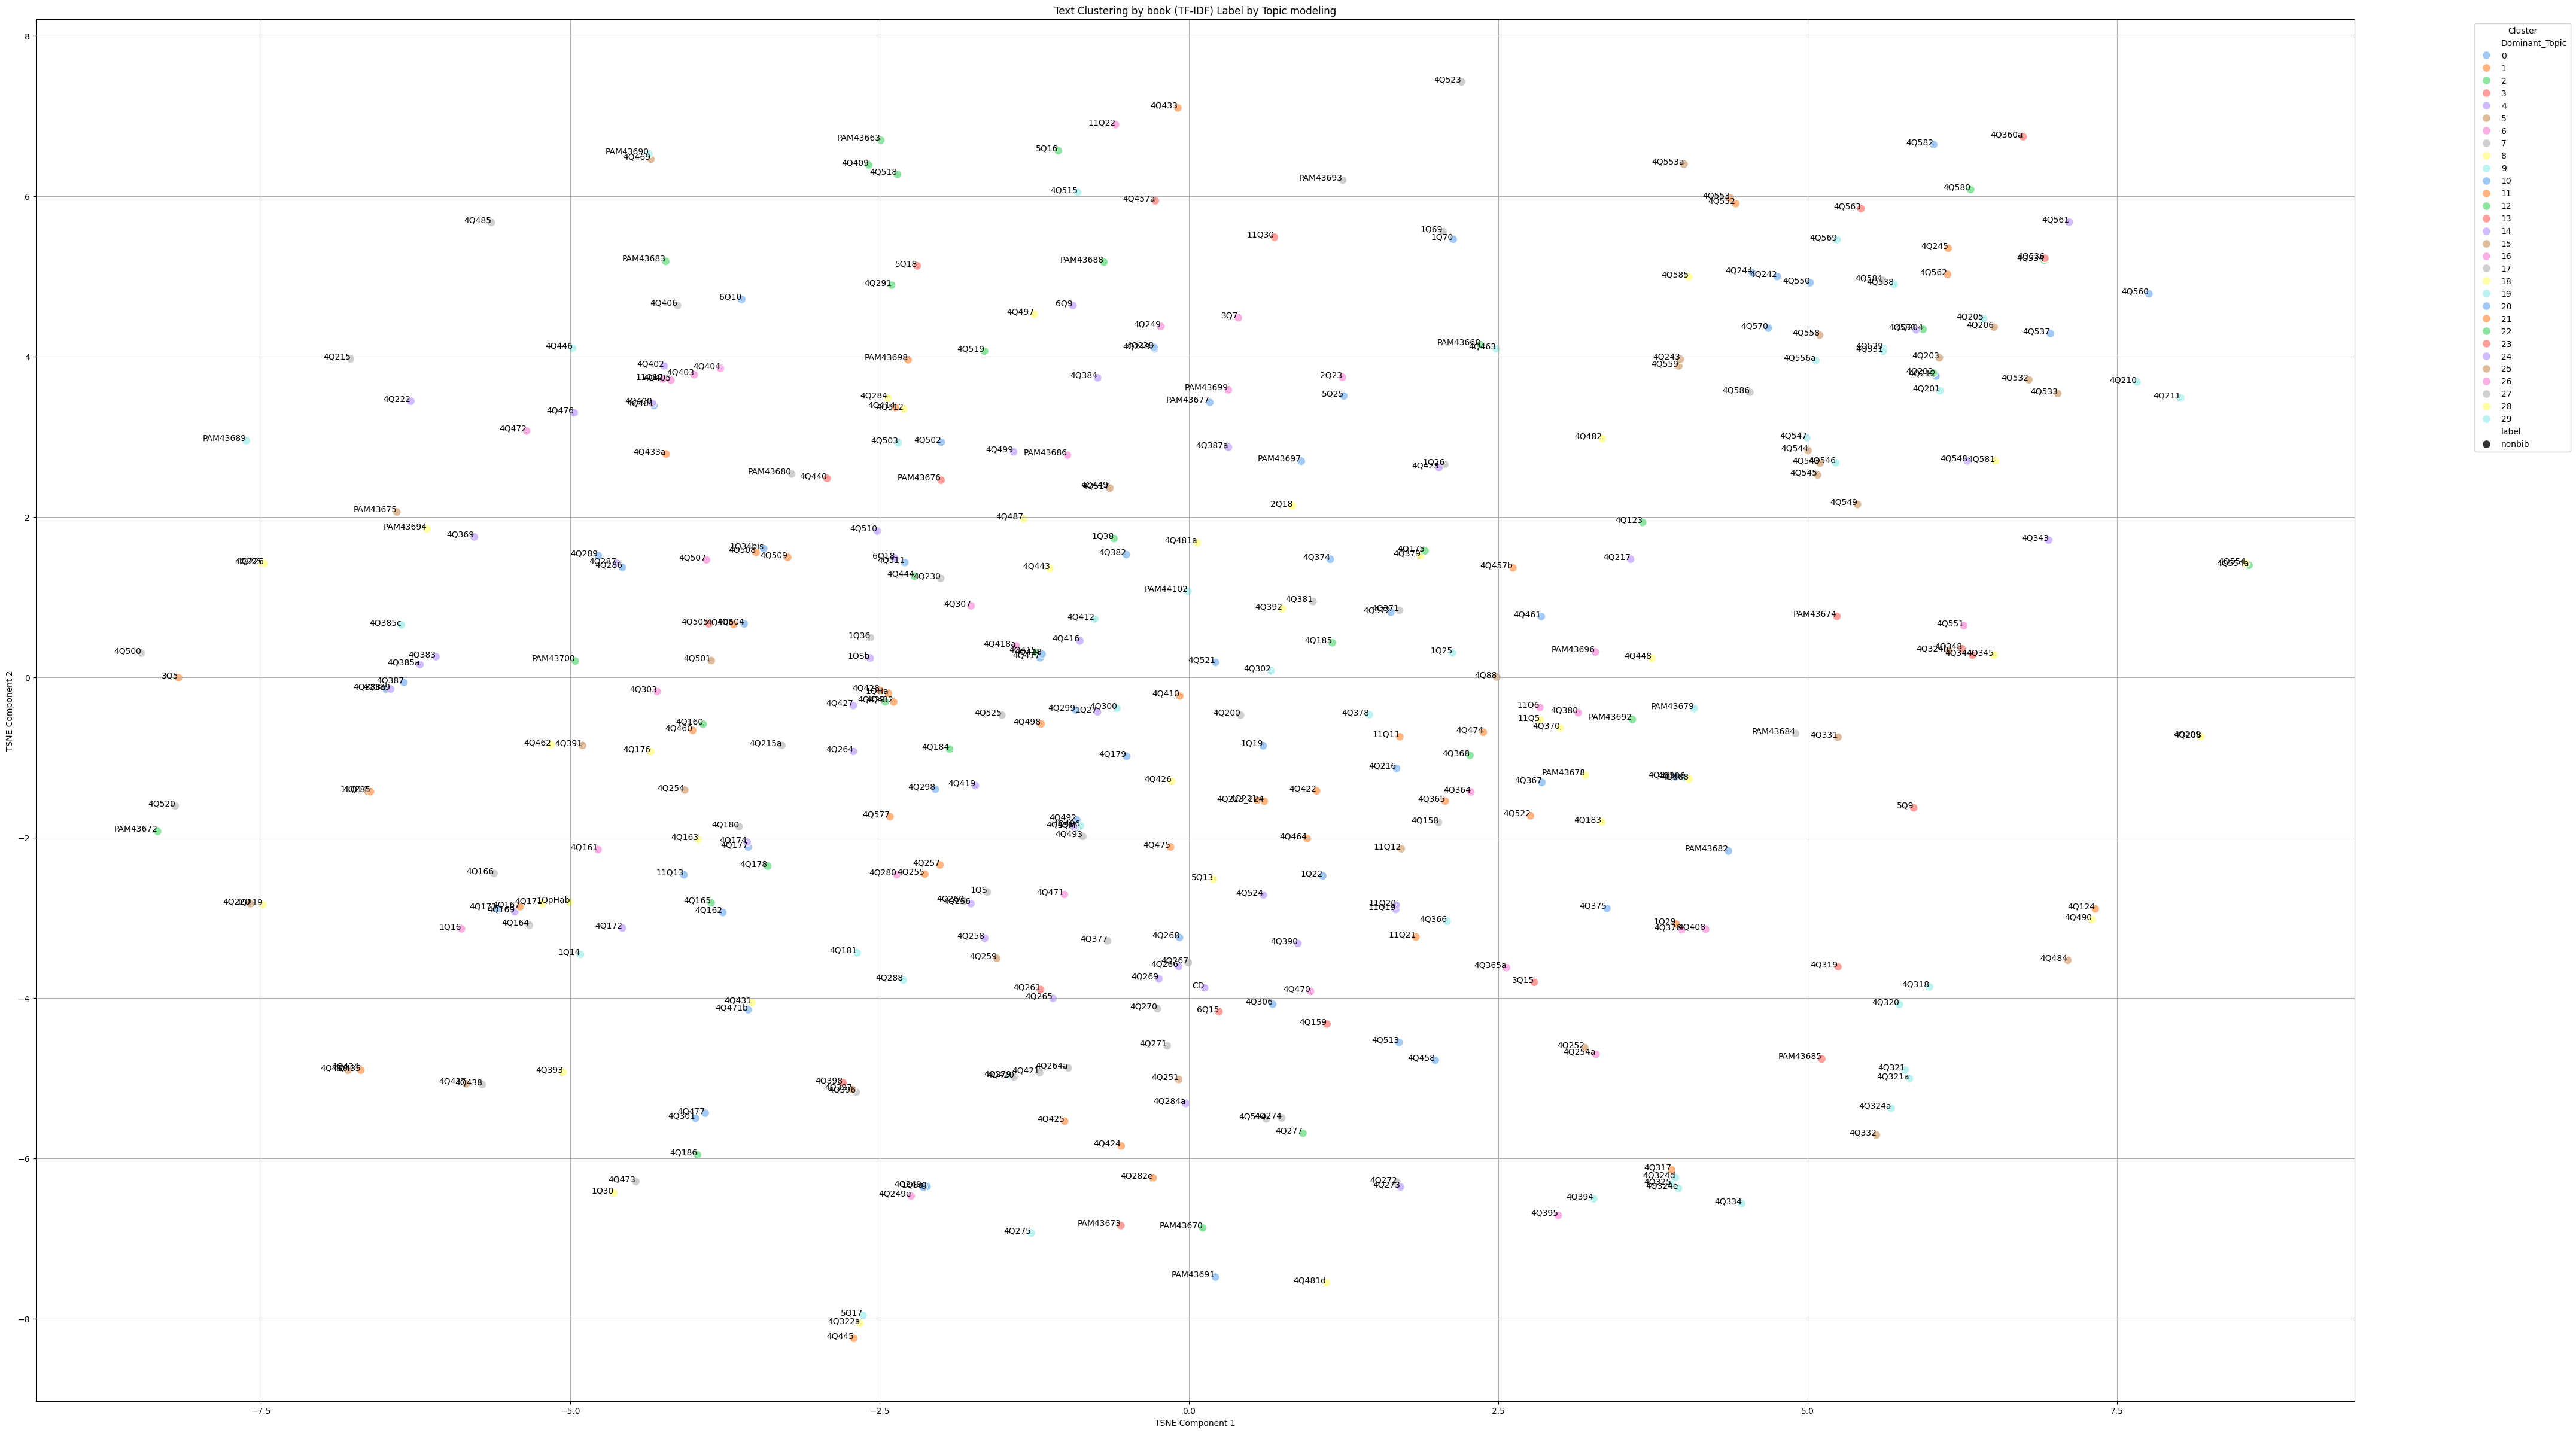

In [40]:

plt.figure(figsize=(50, 30))
scatter = sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df_sampled['Dominant_Topic'], palette='pastel',
                          style=df_sampled['label'], s=100)

# Adding text labels
for i, text in enumerate(df_sampled['book']):
    plt.text(components[i, 0], components[i, 1], text, fontdict=dict(color='black', size=10), ha='right')

plt.title('Text Clustering by book (TF-IDF) Label by Topic modeling')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()